# Chapter 11: Visualization with Matplotlib, Pandas, and Seaborn

# Introduction

Visualization is a critical component in exploratory data analysis, as well as presentations and applications. During exploratory data analysis, you are usually working alone or in small groups and need to create plots quickly to help you better understand your data. It can help you identify outliers and missing data, or it can spark other questions of interest that will lead to further analysis and more visualizations. This type of visualization is usually not done with the end user in mind. It is strictly to help you better your current understanding. The plots don't have to be perfect.

When preparing visualizations for a report or application, a different approach must be used. Attention to small details must be paid. In addition, you usually will have to narrow down all possible visualizations to only the select few that best represent your data. Good data visualizations have the viewer enjoying the experience of extracting information. Almost like movies that make viewers get lost in, good visualizations will have lots of information that really sparks interest.

The primary data visualization library in Python is matplotlib, a project begun in the early 2000s, that was built to mimic the plotting capabilities from Matlab. Matplotlib is enormously capable of plotting most things you can imagine and it gives its users tremendous power to control every aspect of the plotting surface. That said, it isn't quite the friendliest library for beginners to grasp. Thankfully, pandas makes visualizing data very easy for us and usually plots what we want with a single call to the plot method. Pandas actually does no plotting on its own. It internally calls matplotlib functions to create the plots. Pandas also adds its own style that, in my opinion, is a bit nicer than the defaults from matplotlib.

Seaborn is also a visualization library that internally calls matplotlib functions and does not do any actual plotting itself. Seaborn makes beautiful plots very easily and allows for the creation of many new types of plots that are not available directly from matplotlib or pandas. Seaborn works with tidy (long) data, while pandas works best with aggregated (wide) data. Seaborn also accepts pandas DataFrame objects in its plotting functions.

Although it is possible to create plots without ever directly running any matplotlib code, from time to time it will be necessary to use it to tweak finer plot details manually. For this reason, the first two recipes will cover some basics of matplotlib that will come in handy if you need to use it directly. Other than the first two recipes, all plotting examples will use pandas or seaborn.

Visualization in Python does not have to rely on matplotlib necessarily. Bokeh is quickly becoming a very popular interactive visualization library targeted for the web. It is completely independent of matplotlib, and it’s capable of producing entire applications.


## Recipes

* [Getting started with matplotlib](#Getting-started-with-matplotlib)
* [Visualizing data with matplotlib](#Visualizing-data-with-matplotlib)
* [Plotting basics with pandas](#Plotting-basics-with-pandas)
* [Visualizing the flights dataset](#Visualizing-the-flights-dataset)
* [Stacking area charts to discover emerging trends](#Stacking-area-charts-to-discover-emerging-trends)
* [Understanding the differences between seaborn and pandas](#Understanding-the-differences-between-seaborn-and-pandas)
* [Doing multivariate analysis with seaborn grids](#Doing-multivariate-analysis-with-seaborn-grids)
* [Uncovering Simpson's paradox in the diamonds dataset with seaborn](#Uncovering-Simpson's-paradox-in-the-diamonds-dataset-with-seaborn)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Getting started with matplotlib

For many data scientists, the vast majority of their plotting commands will come directly from pandas or seaborn, which both rely completely on matplotlib to do the actual plotting. However, neither pandas nor seaborn offers a complete replacement for matplotlib, and occasionally you will need to use it directly. For this reason, this recipe will offer a short introduction to the most crucial aspects of matplotlib.

### Getting ready

Let's begin our introduction with a look at the anatomy of a matplotlib plot in the following figure:

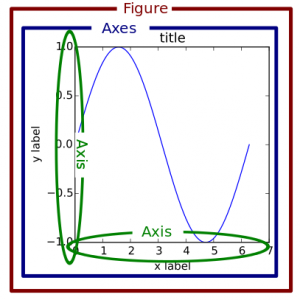

Matplotlib uses a hierarchy of objects to display all of its plotting items in the output. This hierarchy is key to understanding everything about matplotlib. The Figure and Axes objects are the two main components of the hierarchy. The Figure object is at the top of the hierarchy. It is the container for everything that will be plotted. Contained within the Figure is one or more Axes object(s). The Axes is the primary object that you will interact with when using matplotlib and can be more commonly thought of as the actual plotting surface. The Axes contains the x/y axis, points, lines, markers, labels, legends, and any other useful item that is plotted.

#### Note

In early 2017, matplotlib underwent a major change when it released version 2.0. Much of the default plotting parameters were changed. The anatomy figure is actually from the documentation of version 1 but does a better job at distinguishing between the Figure and the Axes than the updated anatomy figure from version 2 (http://bit.ly/2gmNV7h).

A very clear distinction needs to be made between an Axes object and an axis. They are completely separate objects. An Axes object, using matplotlib terminology, is not the plural of axis but instead, as mentioned earlier, the object that creates and controls most of the useful plotting elements. An axis simply refers to the x or y (or even z) axis of a plot.

#### Note

It is unfortunate that matplotlib chose to use axes, the plural of the word axis, to refer to a completely different object, but it is central to the library and unlikely to be changed at this point.

All of these useful plotting elements created by an Axes object are called artists. Even the Figure and the Axes objects themselves are artists. This distinction for artists won't be critical to this recipe but will be useful when doing more advanced matplotlib plotting and especially when reading through the documentation.

### Object-oriented guide to matplotlib

Matplotlib provides two distinct interfaces for users to develop plots with. The stateful interface makes all of its calls directly with the pyplot module. This interface is called stateful because matplotlib implicitly keeps track of the current state of the plotting environment. Whenever a plot is created in the stateful interface, matplotlib finds the current Figure or current Axes and makes changes to it. This approach is fine to plot a few things quickly but can become unwieldy when dealing with multiple Figures and Axes.

Matplotlib also offers a stateless, or object-oriented, interface in which you explicitly use variables that reference specific plotting objects. Each variable can then be used to change some property of the plot. The object-oriented approach is explicit, and you are always aware of exactly what object is being modified.

Unfortunately, having both options has lead to lots of confusion, and matplotlib has a reputation for being difficult to learn. The documentation has examples using both approaches. Tutorials, blog posts, and Stack Overflow posts abound on the web, perpetuating the confusion. This recipe focuses solely on the object-oriented approach, as it is much more Pythonic and much more similar to how we interact with pandas.

If you are new to matplotlib, you might not know how to recognize the difference between each approach. With the stateful interface, all commands will be given directly from pyplot, which is usually aliased plt. Making a simple line plot and adding some labels to each axis would look like this:



Text(0.5, 1.03, 'Figure Title')

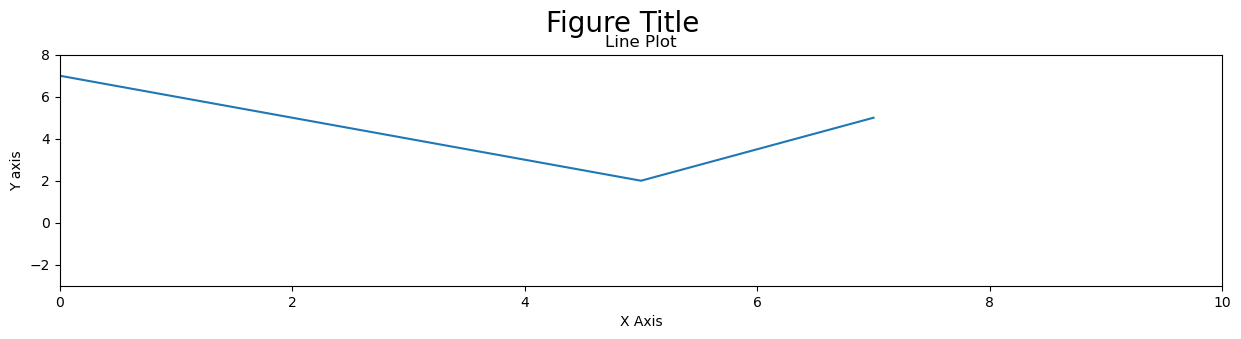

In [2]:
x = [-3, 5, 7]
y = [10, 2, 5]

plt.figure(figsize=(15,3))
plt.plot(x, y)
plt.xlim(0, 10)
plt.ylim(-3, 8)
plt.xlabel('X Axis')
plt.ylabel('Y axis')
plt.title('Line Plot')
plt.suptitle('Figure Title', size=20, y=1.03)

The object-oriented approach still uses pyplot, but typically, it is only to create the Figure and Axes objects during the first step. After creation, methods from these objects are called directly to alter the plot. The following code uses the object-oriented approach to make an exact replication of the previous plot:



Text(0.5, 1.03, 'Figure Title')

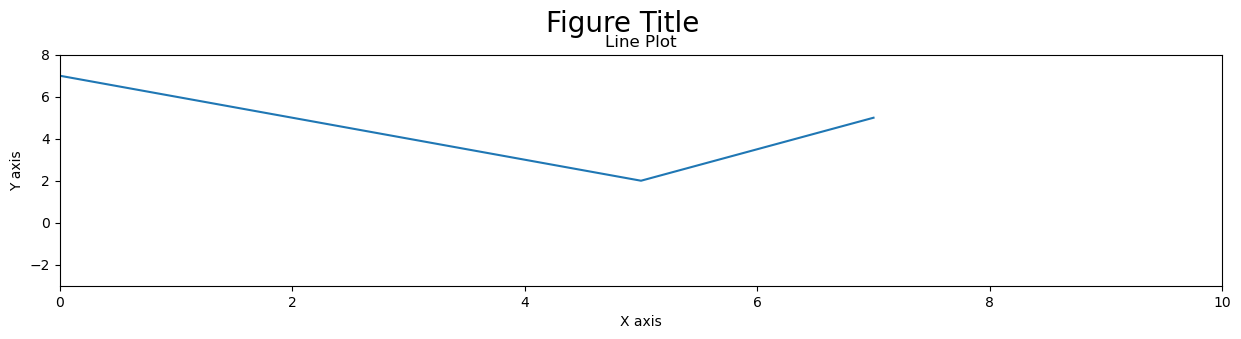

In [3]:
fig, ax = plt.subplots(figsize=(15,3))
ax.plot(x, y)
ax.set_xlim(0, 10)
ax.set_ylim(-3, 8)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_title('Line Plot')
fig.suptitle('Figure Title', size=20, y=1.03)

In this simple example, we directly use only two objects, the Figure, and Axes, but in general, plots can have many hundreds of objects; each one can be used to make modifications in an extremely finely-tuned manner, not easily doable with the stateful interface. In this chapter, we build an empty plot and modify several of its basic properties using the object-oriented interface.

### How to do it...

To get started with matplotlib using the object-oriented approach, you will need to import the pyplot module and alias plt:

In [4]:
import matplotlib.pyplot as plt

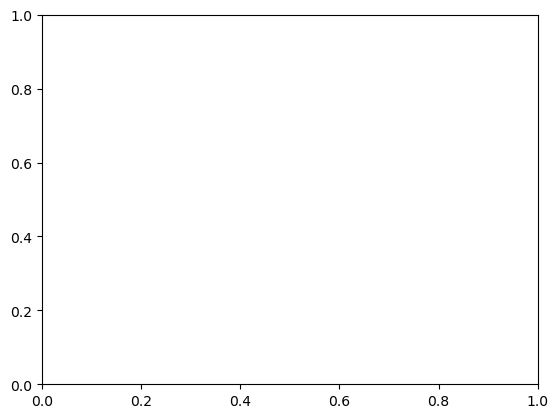

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=1)

The subplots function returns a two-item tuple object containing the Figure and one or more Axes objects (here it is just one), which is unpacked into the variables fig and ax. From here on out, we will directly use these objects by calling methods in a normal object-oriented approach. Let's take a look at the type of each of these objects to ensure that we are actually working with a Figure and an Axes:

In [6]:
type(fig)

matplotlib.figure.Figure

In [7]:
type(ax)

matplotlib.axes._axes.Axes

Although you will be calling more Axes than Figure methods, you might still need to interact with them. Let's find the size of the Figure and then enlarge it:

In [8]:
fig.get_size_inches()

array([6.4, 4.8])

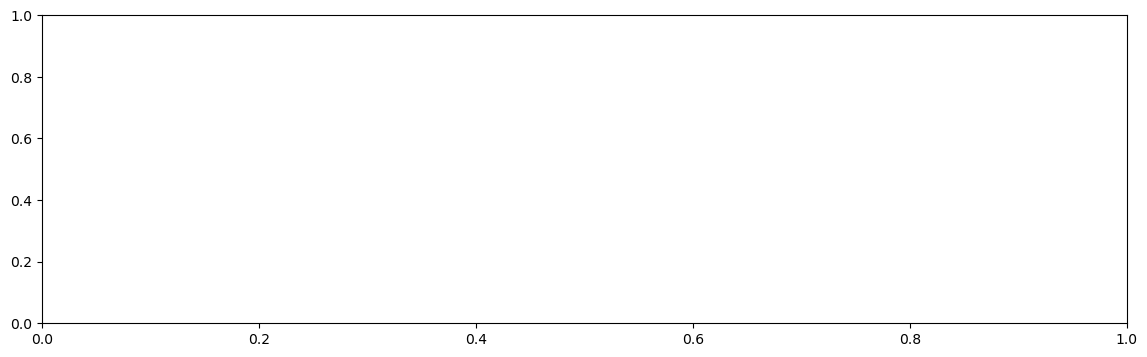

In [9]:
fig.set_size_inches(14, 4)
fig

Before we start plotting, let's examine the matplotlib hierarchy. You can collect all the Axes of the Figure with the axes attribute:

In [10]:
fig.axes

[<Axes: >]

This command returns a list of all the Axes objects. However, we already have our Axes object stored in the ax variable. Let's verify that they are actually the same object:


In [11]:
fig.axes[0] is ax

True

To help visibly differentiate the Figure from the Axes, we can give each one a unique facecolor. Matplotlib accepts a variety of different input types for color. Approximately 140 HTML colors are supported by their string name (see this list: http://bit.ly/2y52UtO). You may also use a string containing a float from zero to one to represent shades of gray:


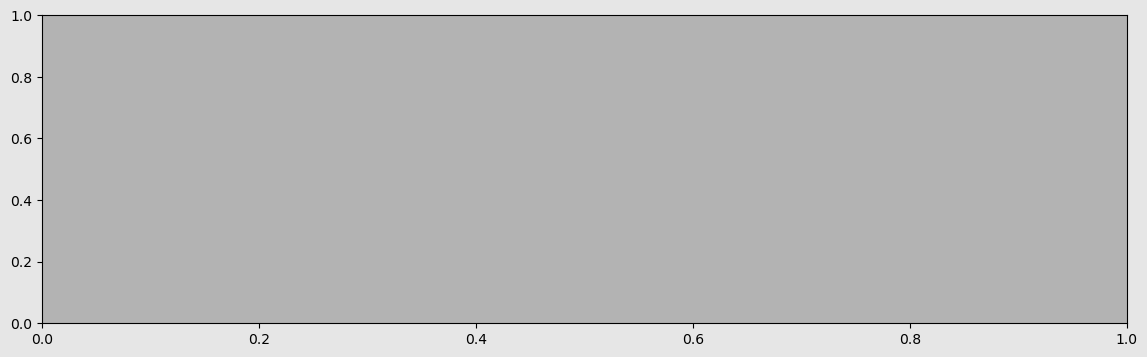

In [12]:
fig.set_facecolor('.9')
ax.set_facecolor('.7')
fig

Now that we have differentiated between the Figure and the Axes, let's take a look at all of the immediate children of the Axes with the get_children method:

In [13]:
ax_children = ax.get_children()
ax_children

 Text(0.5, 1.0, ''),
 Text(0.0, 1.0, ''),
 Text(1.0, 1.0, ''),

Every basic plot has four spines and two axis objects. The spines represent the data boundaries and are the four physical lines that you see bordering the darker gray rectangle (the Axes). The x and y axis objects contain more plotting objects such as the ticks and their labels and the label of the entire axis. We can select the spines from this list, but that isn't generally how it's done. We can access them directly with the spines attribute:

In [14]:
spines = ax.spines
spines

The spines are contained in an ordered dictionary. Let's select the left spine and change its position and width so that it is more prominent and also make the bottom spine invisible:

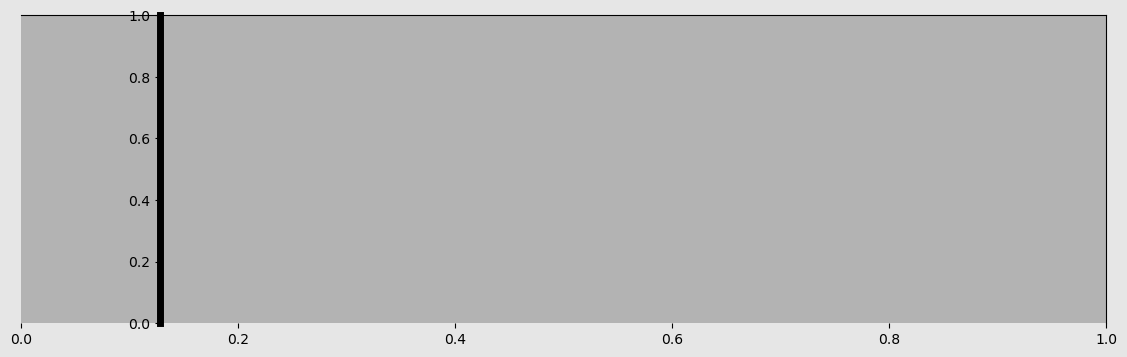

In [15]:
spine_left = spines['left']
spine_left.set_position(('outward', -100))
spine_left.set_linewidth(5)

spine_bottom = spines['bottom']
spine_bottom.set_visible(False)
fig

Now, let's focus on the axis objects. We can access each axis directly through the xaxis and yaxis attributes. Some axis properties are also available directly with the Axes object. In this step, we change some properties of each axis in both manners:

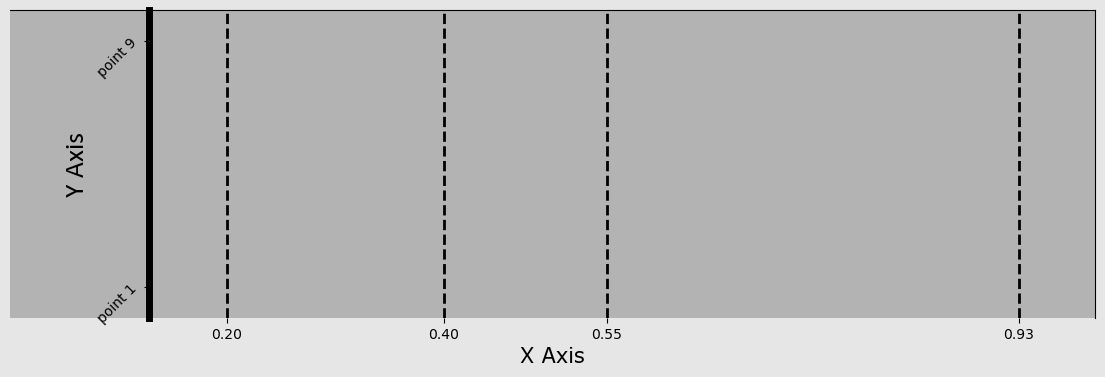

In [16]:
ax.xaxis.grid(True, which='major', linewidth=2, color='black', linestyle='--')
ax.xaxis.set_ticks([.2, .4, .55, .93])
ax.xaxis.set_label_text('X Axis', family='Verdana', fontsize=15)

ax.set_ylabel('Y Axis', family='Calibri', fontsize=20)
ax.set_yticks([.1, .9])
ax.set_yticklabels(['point 1', 'point 9'], rotation=45)
fig

### How it works...

One of the crucial ideas to grasp with the object-oriented approach is that each plotting element has both getter and setter methods. The getter methods all begin with get_ and either retrieve a specific property or retrieve other plotting objects. For instance, ax.get_yscale() retrieves the type of scale that the y axis is plotted with as a string (default is linear), while ax.get_xticklabels() retrieves a list of matplotlib text objects that each have their own getter and setter methods. Setter methods modify a specific property or an entire group of objects. A lot of matplotlib boils down to latching onto a specific plotting element and then examining and modifying it via the getter and setter methods.

#### Note
It might be useful to make an analogy of the matplotlib hierarchy as a home. The home and all of its contents would be the Figure. Each individual room would be the Axes and the contents of the room would be the artists.

The easiest way to begin using the object-oriented interface is with the pyplot module, which is commonly aliased plt, as done in step 1. Step 2 shows one of the most common methods to initiate the object-oriented approach. The plt.subplots function creates a single Figure, along with a grid of Axes objects. The first two parameters, nrows and ncols, define a uniform grid of Axes objects. For example, plt.subplots(2,4) creates eight total Axes objects of the same size inside one Figure.

The plt.subplots function is somewhat of an oddity in that it returns a two-item tuple. The first element is the Figure, and the second element is the Axes object. This tuple gets unpacked as two distinct variables, fig and ax. If you are not accustomed to tuple unpacking, it may help to see step 2 written like this:

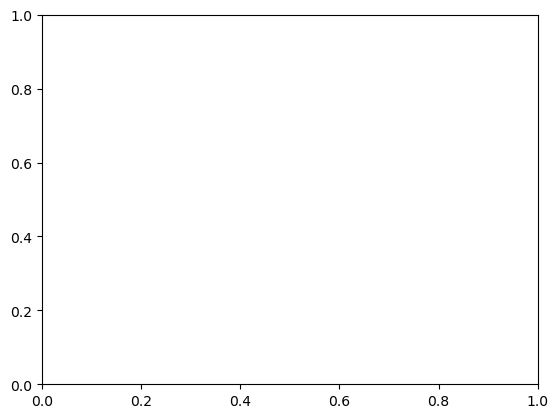

In [17]:
plot_objects = plt.subplots(nrows=1, ncols=1)
type(plot_objects)
fig = plot_objects[0]
ax = plot_objects[1]

If you create more than one Axes with plt.subplots , then the second item in the tuple is a NumPy array containing all the Axes. Let's demonstrate that here:

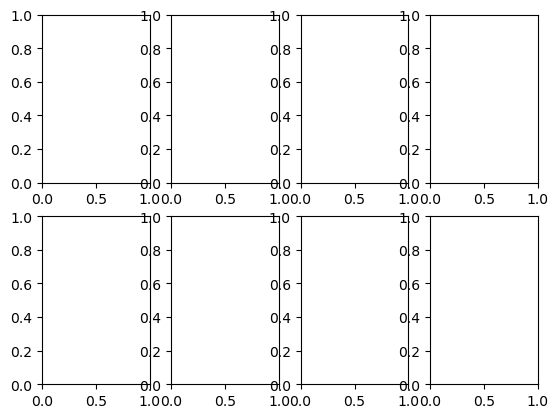

In [18]:
plot_objects = plt.subplots(2, 4)

The plot_objects variable is a tuple containing a Figure as its first element and a Numpy array as its second:

In [19]:
plot_objects[1]

array([[<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

Step 3 verifies that we indeed have Figure and Axes objects referenced by the appropriate variables. In step 4, we come across the first example of getter and setter methods. Matplotlib defaults all Figures to 6 inches in width by 4 inches in height, which is not the actual size of it on the screen, but would be the exact size if you saved the Figure to a file.

Step 5 shows that, in addition to the getter method, you can sometimes directly access another plotting object by its attribute. Often, there exist both an attribute and a getter method to retrieve the same object. For instance, look at these examples:


In [20]:
fig.axes == fig.get_axes()
ax.xaxis == ax.get_xaxis()
ax.yaxis == ax.get_yaxis()

True

Many artists have a facecolor property that can be set to cover the entire surface one particular color, as in step 7. In step 8, the get_children method can be used to get a better understanding of the object hierarchy. A list of all the objects directly below the Axes is returned. It is possible to select all of the objects from this list and start using the setter methods to modify properties, but this isn't customary. We usually collect our objects directly from the attributes or getter methods.

Often, when retrieving a plotting object, they will be returned in a container like a list or a dictionary. This is what happens when collecting the spines in step 9. You will have to select the individual objects from their respective containers in order to use the getter or setter methods on them, as done in step 10. It is also common to use a for-loop to iterate through each of them one at a time.

Step 11 adds grid lines in a peculiar way. We would expect there to be a get_grid and set_grid method, but instead, there is just a grid method, which accepts a boolean as the first argument to turn on/off the grid lines. Each axis has both major and minor ticks, though by default the minor ticks are turned off. The which parameter is used to select which type of tick has a grid line.

Notice that the first three lines of step 11 select the xaxis attribute and call methods from it, while the last three lines call equivalent methods directly from the Axes object itself. This second set of methods is a convenience provided by matplotlib to save a few keystrokes. Normally, most objects can only set their own properties, not those of their children. Many of the axis-level properties are not able to be set from the Axes, but in this step, some are. Either method is acceptable.

When adding the grid lines with the first line in step 11, we set the properties linewidth, color, and linestyle. These are all properties of a matplotlib line, formally a Line2D object. You can view all of the available properties here: http://bit.ly/2kE6MiG. The set_ticks method accepts a sequence of floats and draws tick marks for only those locations. Using an empty list will completely remove all ticks.

Each axis may be labeled with some text, for which matplotlib formally uses a Text object. Only a few of all the available text properties (http://bit.ly/2yXIZfP) are changed. The set_yticklabels Axes method takes in a list of strings to use as the labels for each of the ticks. You may set any number of text properties along with it.

There's more...

To help find all the possible properties of each of your plotting objects, simply make a call to the properties method, which displays all of them as a dictionary. Let's see a curated list of the properties of an axis object:

In [21]:
ax.xaxis.properties()

{'agg_filter': None,
 'alpha': None,
 'animated': False,
 'children': [Text(0.5, 23.52222222222222, ''),
  Text(1, 24.911111111111108, ''),
 'clip_box': <matplotlib.transforms.TransformedBbox at 0x234fb55bcd0>,
 'clip_on': True,
 'clip_path': None,
 'data_interval': array([ inf, -inf]),
 'figure': <Figure size 640x480 with 1 Axes>,
 'gid': None,
 'gridlines': <a list of 6 Line2D gridline objects>,
 'in_layout': True,
 'inverted': False,
 'label': Text(0.5, 23.52222222222222, ''),
 'label_position': 'bottom',
 'label_text': '',
 'major_formatter': <matplotlib.ticker.ScalarFormatter at 0x234fb5599c0>,
 'major_locator': <matplotlib.ticker.AutoLocator at 0x234fb559a20>,
 'major_ticks': [<matplotlib.axis.XTick at 0x234fb55a200>,
 'majorticklabels': [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')],
 'majorticklines': <a list of 12 Line2D ticklines objects>,
 'majorticklocs': array([0. , 0.2

# Visualizing data with matplotlib

Matplotlib has a few dozen plotting methods that make nearly any kind of plot imaginable. Line, bar, histogram, scatter, box, violin, contour, pie, and many more plots are available as methods from the Axes object. It was only in version 1.5 (released in 2015) that matplotlib began accepting data from pandas DataFrames. Before this, data had to be passed to it from NumPy arrays or Python lists.

### Getting ready

In this recipe, we will visualize the trend in movie budgets over time by reducing our data from pandas DataFrames down to NumPy arrays, which we will then pass to matplotlib plotting functions.

### How to do it...

Now that we know how to select plotting elements and change their attributes, let's actually create a data visualization. Let's read in the movie dataset, calculate the median budget for each year, and then find the five year rolling average to smooth the data:


In [22]:
movie = pd.read_csv('data/movie.csv')

med_budget = movie.groupby('title_year')['budget'].median() / 1e6
med_budget_roll = med_budget.rolling(5, min_periods=1).mean()
med_budget_roll.tail()

title_year
2012.0    20.893
2013.0    19.893
2014.0    19.100
2015.0    17.980
2016.0    17.780
Name: budget, dtype: float64

Let's get our data into NumPy arrays:

In [23]:
years = med_budget_roll.index.values
years[-5:]

array([2012., 2013., 2014., 2015., 2016.])

In [24]:
budget = med_budget_roll.values
budget[-5:]

array([20.893, 19.893, 19.1  , 17.98 , 17.78 ])

The plot method is used to create line plots. Let's use it to plot the rolling median of budgets over time in a new Figure:

Text(0, 0.5, 'Millions of Dollars')

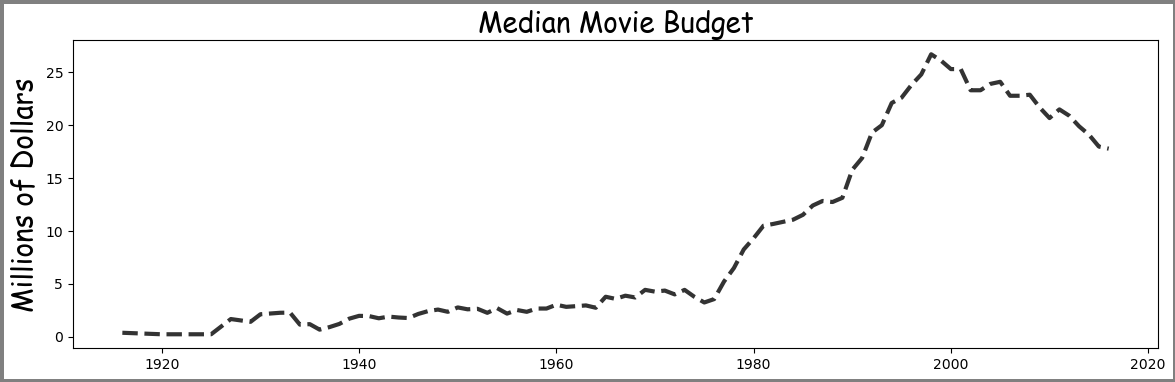

In [25]:
fig, ax = plt.subplots(figsize=(14,4), linewidth=5, edgecolor='.5')
ax.plot(years, budget, linestyle='--', linewidth=3, color='.2', label='All Movies')
text_kwargs=dict(fontsize=20, family='cursive')
ax.set_title('Median Movie Budget', **text_kwargs)
ax.set_ylabel('Millions of Dollars', **text_kwargs)

It's quite interesting that the median movie budget peaked in the year 2000 and has subsequently fallen. Perhaps this is just an artifact of the dataset, in which we have more data in recent years of all the movies, not just the most popular ones. Let's find the count of the number of movies per year:

In [26]:
movie_count = movie.groupby('title_year')['budget'].count()
movie_count.tail()

title_year
2012.0    191
2013.0    208
2014.0    221
2015.0    192
2016.0     86
Name: budget, dtype: int64

Any number of plots may be put on a single Axes, and these counts can be plotted directly with the median budget as a bar chart. As the units for both plots are completely different (dollars versus count), we can either create a secondary y axis or scale the counts to be in the same range as the budget. We choose the latter and label each bar with its value as text, directly preceding it. As the vast majority of the data is contained in recent years, we can also limit the data to those movies made from 1970 onward:

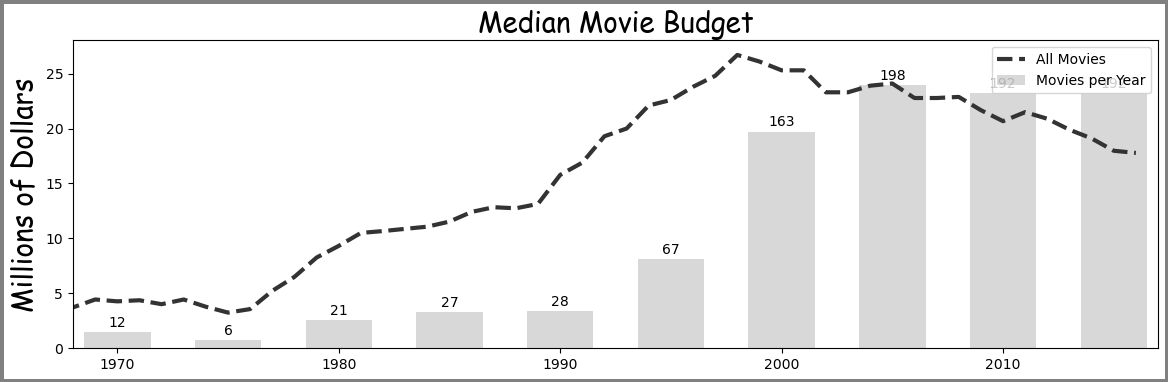

In [27]:
ct = movie_count.values
ct_norm = ct / ct.max() * budget.max()

fifth_year = (years % 5 == 0) & (years >= 1970)
years_5 = years[fifth_year]
ct_5 = ct[fifth_year]
ct_norm_5 = ct_norm[fifth_year]

ax.bar(years_5, ct_norm_5, 3, facecolor='.5', alpha=.3, label='Movies per Year')
ax.set_xlim(1968, 2017)
for x, y, v in zip(years_5, ct_norm_5, ct_5):
    ax.text(x, y + .5, str(v), ha='center')
ax.legend()
fig

This trend might not hold if we just look at the top 10 budgeted movies per year. Let's find the five year rolling median for just the top 10 movies per year:

In [28]:
top10 = movie.sort_values('budget', ascending=False) \
                 .groupby('title_year')['budget'] \
                 .apply(lambda x: x.iloc[:10].median() / 1e6)

top10_roll = top10.rolling(5, min_periods=1).mean()
top10_roll.tail()

title_year
2012.0    192.9
2013.0    195.9
2014.0    191.7
2015.0    186.8
2016.0    189.1
Name: budget, dtype: float64

These numbers represent an order of a magnitude higher than those found in step 13 for all the data. Plotting both lines on the same scale would not look good. Let's create an entirely new Figure with two subplots (Axes) and plot the data from the previous step in the second Axes:

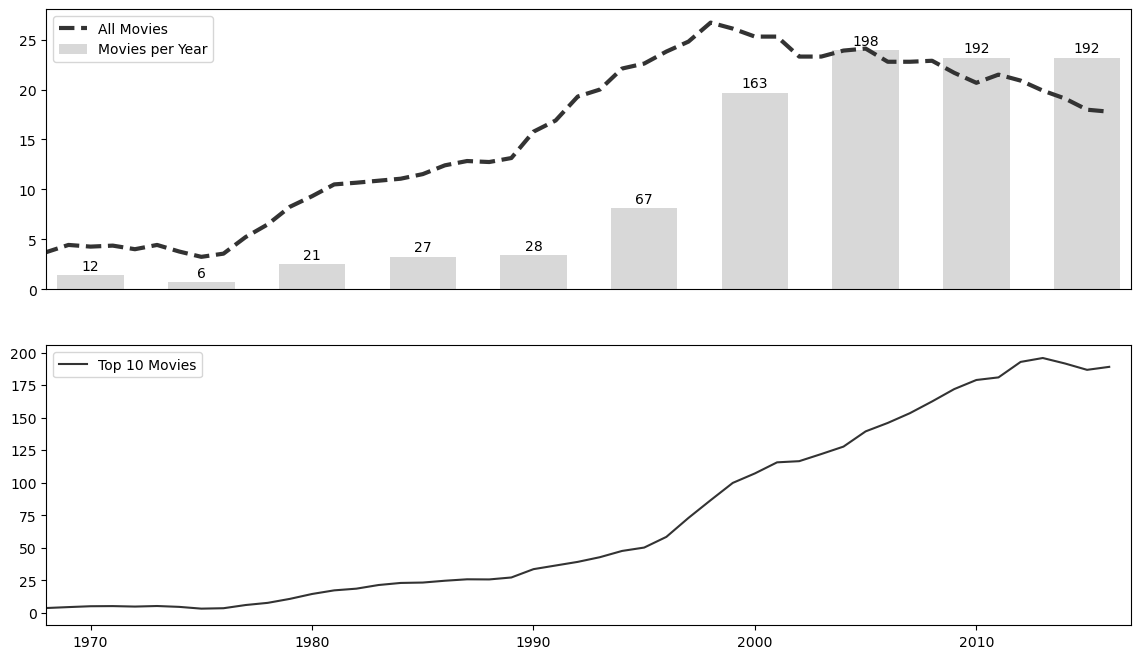

In [29]:
fig2, ax_array = plt.subplots(2, 1, figsize=(14,8), sharex=True)
ax1 = ax_array[0]
ax2 = ax_array[1]

ax1.plot(years, budget, linestyle='--', linewidth=3, 
             color='.2', label='All Movies')
ax1.bar(years_5, ct_norm_5, 3, facecolor='.5', 
            alpha=.3, label='Movies per Year')
ax1.legend(loc='upper left')
ax1.set_xlim(1968, 2017)
plt.setp(ax1.get_xticklines(), visible=False)

for x, y, v in zip(years_5, ct_norm_5, ct_5):
    ax1.text(x, y + .5, str(v), ha='center')

ax2.plot(years, top10_roll.values, color='.2',
             label='Top 10 Movies')
ax2.legend(loc='upper left')

### How it works...

In step 1, we begin with a quest to analyze movie budgets by finding the median budget per year in millions of dollars. After finding the median budget for each year, we decided to smooth it out, as there is going to be quite a lot of variability from year to year. We choose to smooth the data because we are looking for a general trend and are not necessarily interested in the exact value of any one year.

In this step, we use the rolling method to calculate a new value for each year based on the average of the last five years of data. For example, the median budgets from the years 2011 through 2015 are grouped together and averaged. The result is the new value for the year 2015. The only required parameter for the rolling method is the size of the window, which, by default, ends at the current year.

The rolling method returns a groupby-like object that must have its groups acted on with another function to produce a result. Let's manually verify that the rolling method works as expected for a few of the previous years:

In [30]:
med_budget.loc[2012:2016].mean()

17.78

In [31]:
med_budget.loc[2011:2015].mean()

17.98

In [32]:
med_budget.loc[2010:2014].mean()

19.1

These values are the same as the output from step 1. In step 2, we get ready to use matplotlib by putting our data into NumPy arrays. In step 3, we create our Figure and Axes to set up the object-oriented interface. The plt.subplots method supports a large number of inputs. See the documentation to view all possible parameters for both this and for the figure function (http://bit.ly/2ydM8ZU and http://bit.ly/2ycno40).

The first two parameters in the plot method represent the x and y values for a line plot. All of the line properties are available to be changed inside the call to plot. The set_title Axes method provides a title and can set all the available text properties inside its call. The same goes for the set_ylablel method. If you are setting the same properties for many objects, you can pack them together into a dictionary and pass this dictionary as one of the arguments, as done with **text_kwargs.

In step 4, we notice an unexpected downward trend in median budget beginning around the year 2000 and suspect that the number of movies collected per year might play an explanatory role. We choose to add this dimension to the graph by creating a bar plot of every fifth year of data beginning from 1970. We use boolean selection on our NumPy data arrays in the same manner as we do for the pandas Series in step 5.

The bar method takes the x-value the height, and the width of the bars as its first three arguments and places the center of the bars directly at each x-value. The bar height was derived from the movie count that was first scaled down to be between zero and one, and then multiplied by the maximum median budget. These bar heights are stored in the variable ct_norm_5. To label each bar correctly, we first zip together the bar center, its height, and the actual movie count. We then loop through this zipped object and place the count preceding the bar with the text method, which accepts an x-value, y-value, and a string. We adjust the y-value slightly upwards and use the horizontal alignment parameter, ha, to center the text.

Look back at step 3, and you will notice the plot method with the label parameter equal to All Movies. This is the value that matplotlib uses when you create a legend for your plot. A call to the legend Axes method puts all the plots with assigned labels in the legend.

To investigate the unexpected dip in the median budget, we can focus on just the top 10 budgeted movies for each year. Step 6 uses a custom aggregation function after grouping by year to do so, and then smooths the result in the same manner as before. These results could be plotted directly on the same graph, but because the values are so much greater, we opt to create an entire new Figure with two Axes.

We start step 7 by creating a Figure with two subplots in a two row by one column grid. Remember that when creating more than one subplot, all the Axes get stored in a NumPy array. The final result from step 5 is recreated in the top Axes. We plot the top 10 budgeted movies in the bottom Axes. Notice that the years align for both the bottom and top Axes because the sharex parameter was set to True in the Figure creation. When sharing an axis, matplotlib removes the labels for all the ticks but keeps those tiny vertical lines for each tick. To remove these tick lines, we use the setppyplot function. Although this isn't directly object-oriented, it is explicit and very useful when we want to set properties for an entire sequence of plotting objects. We set all the tick lines to invisible with this useful function.

Finally, we then make several calls to Figure methods. This is a departure from our normal calling of Axes methods. The tight_layout method adjusts the subplots to look much nicer by removing extra space and ensuring that different Axes don't overlap. The suptitle method creates a title for the entire Figure, as opposed to the set_title Axes method, which creates titles for individual Axes. It accepts an x and y location to represent a place in the figure coordinate system, in which (0, 0) represents the bottom left and (1, 1) represents the top right. By default, the y-value is 0.98, but we move it up a few points to 1.02.

#### Note
Each Axes also has a coordinate system in which (0, 0) is used for the bottom left and (1, 1) for the top right. In addition to those coordinate system, each Axes also has a data coordinate system, which is more natural to most people and represents the bounds of the x and y-axis. These bounds may be retrieved with ax.get_xlim() and ax.get_ylim() respectively. All the plotting before this used the data coordinate system. See the Transformations tutorial to learn more about the coordinate systems (http://bit.ly/2gxDkX3).

As both Axes use the same units for the y axis, we use the text Figure method to place a custom y axis label directly between each Axes, using the figure coordinate system. Finally, we save the Figure to our desktop. The tilde, ~, in the path represents the home directory, but the savefig method won't understand what this means. You must use the expanduser function from the os library to create the full path. For instance, the path variable becomes the following on my machine:

In [34]:
import os
os.path.expanduser('~/Desktop/movie_budget.png')

'C:\\Users\\Sumanth/Desktop/movie_budget.png'

The savefig method can now create the file in the correct location. By default, savefig will save only what is plotted within (0, 0) to (1, 1) of the figure coordinate system. As our title is slightly outside of this area, some of it will be cropped. Setting the bbox_inches parameter to tight will have matplotlib include any titles or labels that are extending outside of this region.

### There's more...

Matplotlib began accepting pandas DataFrames for all of its plotting functions after the release of version 1.5. The DataFrame gets passed to the plotting method through the data parameter. Doing so allows you to reference the columns with string names. The following script creates a scatter plot of the IMDB score against the year for a random selection of 100 movies made from 2000 onwards. The sizes of each point are proportional to the budget:



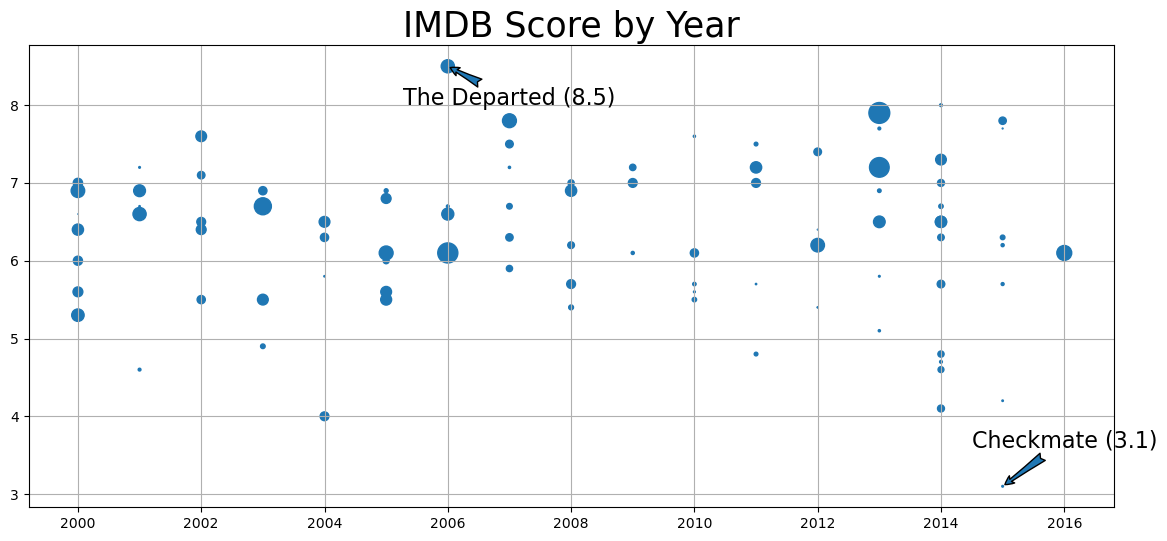

In [36]:
cols = ['budget', 'title_year', 'imdb_score', 'movie_title']
m = movie[cols].dropna()
m['budget2'] = m['budget'] / 1e6
np.random.seed(0)
movie_samp = m.query('title_year >= 2000').sample(100)

fig, ax = plt.subplots(figsize=(14,6))
ax.scatter(x='title_year', y='imdb_score',
               s='budget2', data=movie_samp)

idx_min = movie_samp['imdb_score'].idxmin()
idx_max = movie_samp['imdb_score'].idxmax()
for idx, offset in zip([idx_min, idx_max], [.5, -.5]):
    year = movie_samp.loc[idx, 'title_year']
    score = movie_samp.loc[idx, 'imdb_score']
    title = movie_samp.loc[idx, 'movie_title']
    ax.annotate(xy=(year, score), 
                xytext=(year + 1, score + offset), 
                text=title + ' ({})'.format(score),ha='center',size=16,
                arrowprops=dict(arrowstyle="fancy"))
    ax.set_title('IMDB Score by Year', size=25)
    ax.grid(True)

After creating the scatter plot, the highest and lowest scoring movies are labeled with the annotate method. The xy parameter is a tuple of the point that we would like to annotate. The xytext parameter is another tuple coordinate of the text location. The text is centered there due to ha being set to center

# Plotting basics with pandas
Pandas makes plotting quite easy by automating much of the procedure for you. All pandas plotting is handled internally by matplotlib and is publicly accessed through the DataFrame or Series plot method. We say that the pandas plot method is a wrapper around matplotlib. When you create a plot in pandas, you will be returned a matplotlib Axes or Figure. You can use the full power of matplotlib to modify this object until you get the desired result.

Pandas is only able to produce a small subset of the plots available with matplotlib, such as line, bar, box, and scatter plots, along with kernel density estimates (KDEs) and histograms. Pandas excels at the plots it does create by making the process very easy and efficient, usually taking just a single line of code, saving lots of time when exploring data.

### Getting ready

One of the keys to understanding plotting in pandas is to know whether the plotting method requires one or two variables to make the plot. For instance, line and scatter plots require two variables to plot each point. The same holds true for bar plots, which require some x-coordinates to locate the bar and another variable for the height of the bar. Boxplots, histograms, and KDEs use only a single variable to make their plots.

The two-variable line and scatter plots, by default, use the index as the x axis and the values of the columns as the y axis. The one-variable plots ignore the index and apply a transformation or aggregation to each variable to make their plots. In this recipe, we will look at the differences between two-variable and one-variable plots in pandas.

### How to do it..

Create a small DataFrame with a meaningful index:

In [37]:
df = pd.DataFrame(index=['Atiya', 'Abbas', 'Cornelia', 
                             'Stephanie', 'Monte'], 
                      data={'Apples':[20, 10, 40, 20, 50],
                            'Oranges':[35, 40, 25, 19, 33]})

In [38]:
df

,Apples,Oranges
Atiya,20,35
Abbas,10,40
Cornelia,40,25
Stephanie,20,19
Monte,50,33


Bar plots use the index of the labels for the x axis and the column values as the bar heights. Use the plot method with the kind parameter set to bar:

<Axes: >

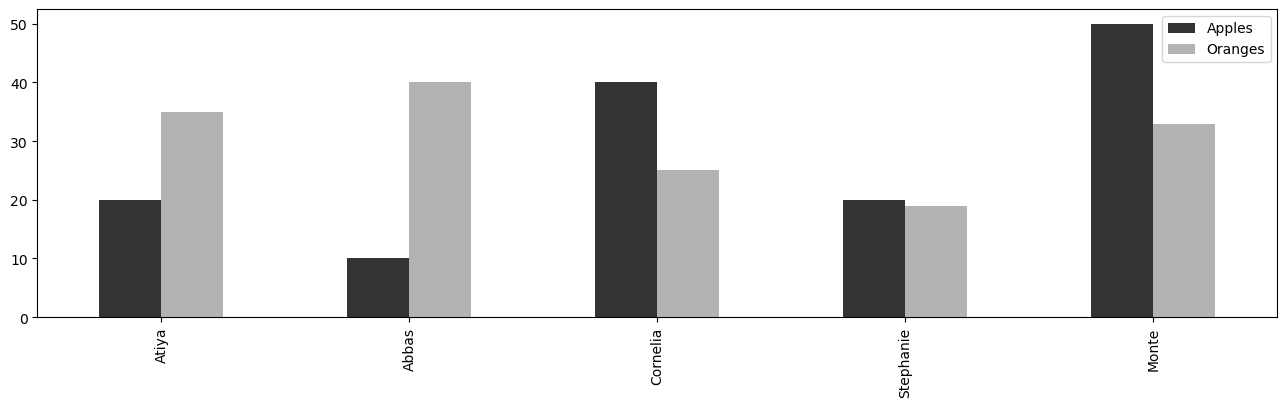

In [39]:
color = ['.2', '.7']
df.plot(kind='bar', color=color, figsize=(16,4))


A KDE plot ignores the index and uses the values of each column as the x axis and calculates a probability density for the y values:

<Axes: ylabel='Density'>

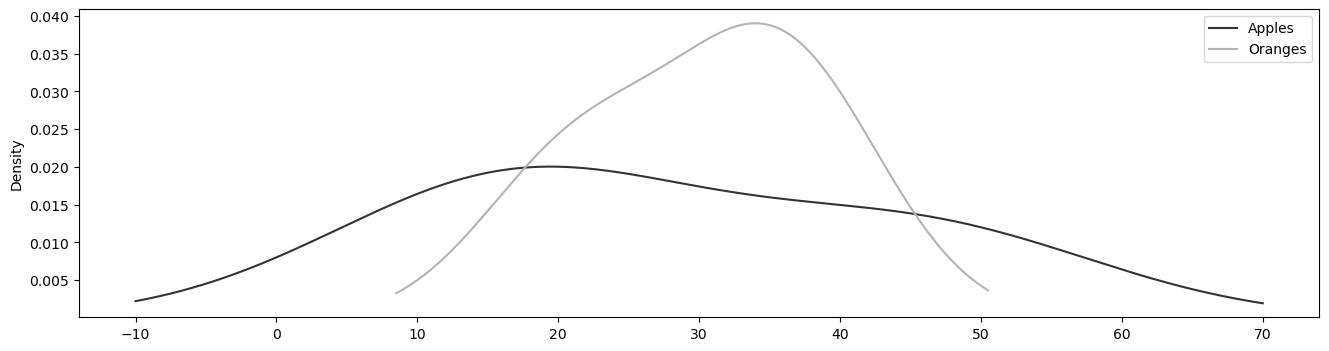

In [40]:
df.plot(kind='kde', color=color, figsize=(16,4))

Let's plot all two-variable plots together in a single Figure. The scatter plot is the only one that requires you to specify columns for the x and y values. If you wish to use the index for a scatter plot, you will have to use the reset_index method to make it a column. The other two plots use the index for the x axis and make a new set of lines/bars for every single numeric column:

<Axes: title={'center': 'Bar plot'}>

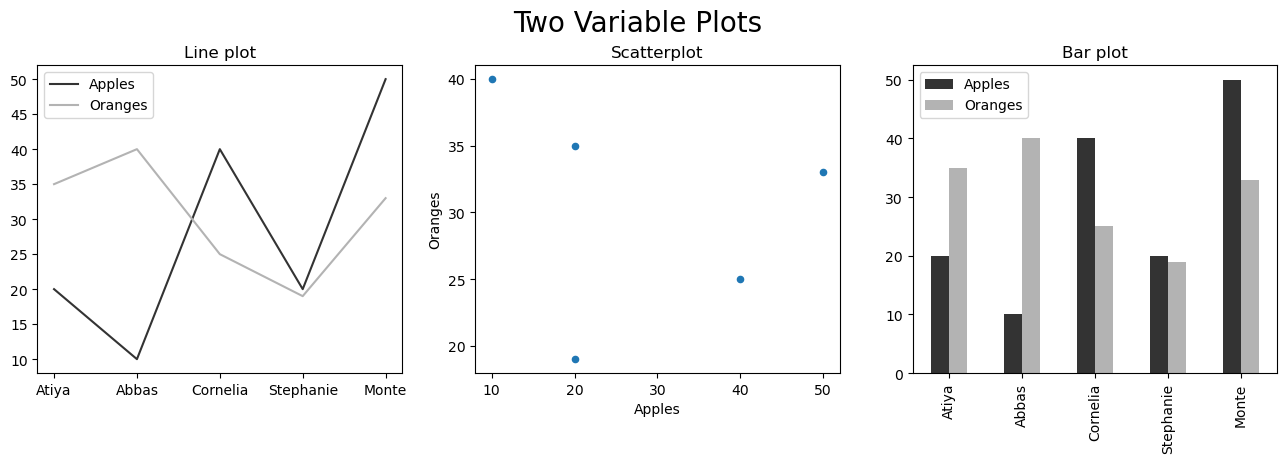

In [42]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,4))
fig.suptitle('Two Variable Plots', size=20, y=1.02)
df.plot(kind='line', color=color, ax=ax1, title='Line plot')
df.plot(x='Apples', y='Oranges', kind='scatter', 
            ax=ax2, title='Scatterplot')
df.plot(kind='bar', color=color, ax=ax3, title='Bar plot')

Let's put all the one-variable plots in the same Figure as well:

<Axes: title={'center': 'Histogram'}, ylabel='Frequency'>

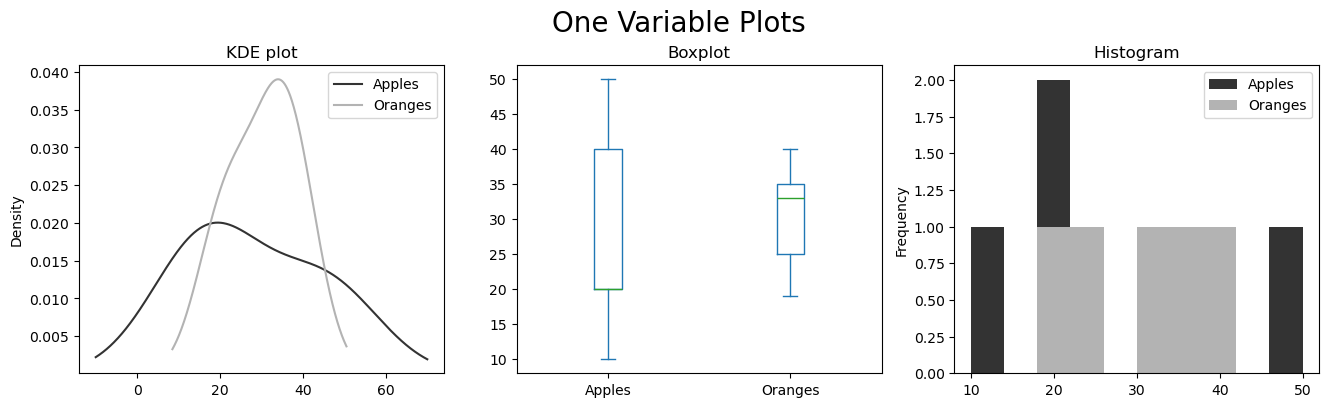

In [43]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,4))
fig.suptitle('One Variable Plots', size=20, y=1.02)
df.plot(kind='kde', color=color, ax=ax1, title='KDE plot')
df.plot(kind='box', ax=ax2, title='Boxplot')
df.plot(kind='hist', color=color, ax=ax3, title='Histogram')

### How it works...

Step 1 creates a small sample DataFrame that will help us illustrate the differences between two and one-variable plotting with pandas. By default, pandas will use each numeric column of the DataFrame to make a new set of bars, lines, KDEs, boxplots, or histograms and use the index as the x values when it is a two-variable plot. One of the exceptions is the scatter plot, which must be explicitly given a single column for the x and y values.

The pandas plot method is very versatile and has a large number of parameters that allow you to customize the result to your liking. For instance, you can set the Figure size, turn the gridlines on and off, set the range of the x and y axis, color the plot, rotate the tick marks, and much more.

You can also use any of the arguments available to the specific matplotlib plotting method. The extra arguments will be collected by the **kwds parameter from the plot method and correctly passed to the underlying matplotlib function. For example, In step 2, we create a bar plot. This means that we can use all of the parameters available in the matplotlib bar function as well as the ones available in the pandas plot method (http://bit.ly/2z2l3rJ).

In step 3, we create a single-variable KDE plot, which creates a density estimate for each numeric column in the DataFrame. Step 4 places all the two-variable plots in the same Figure. Likewise, step 5 places all the one-variable plots together. Each of steps 4 and 5 creates a Figure with three Axes objects. The command plt.subplots(1, 3) creates a Figure with three Axes spread over a single row and three columns. It returns a two-item tuple consisting of the Figure and a one-dimensional NumPy array containing the Axes. The first item of the tuple is unpacked into the variable fig. The second item of the tuple is unpacked into three more variables, one for each Axes. The pandas plot method handily comes with an ax parameter, allowing us to place the result of the plot into a specific Axes in the Figure.

### There's more...

With the exception of the scatter plot, all the plots did not specify the columns to be used. Pandas defaulted to using every single numeric column, as well as the index in the case of two-variable plots. You can, of course, specify the exact columns that you would like to use for each x or y value:

<Axes: ylabel='Density'>

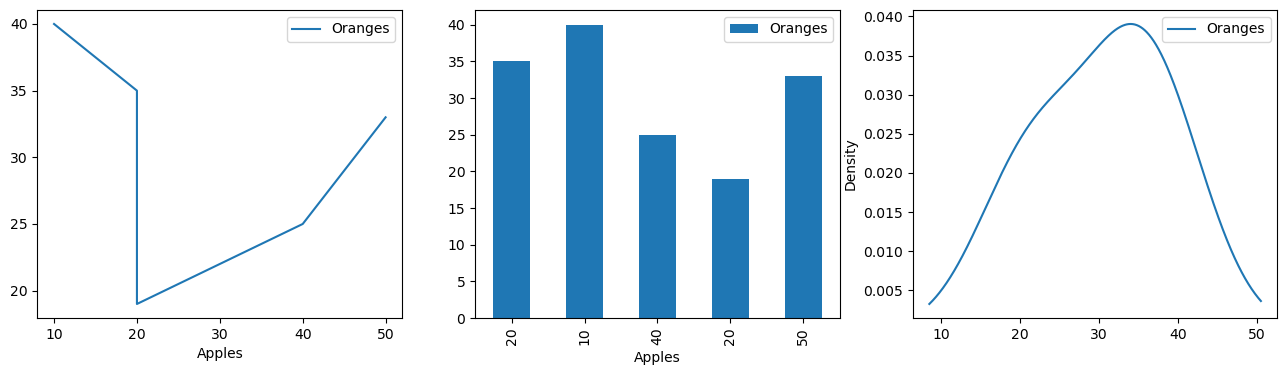

In [44]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,4))
df.sort_values('Apples').plot(x='Apples', y='Oranges', 
                                  kind='line', ax=ax1)
df.plot(x='Apples', y='Oranges', kind='bar', ax=ax2)
df.plot(x='Apples', kind='kde', ax=ax3)

# Visualizing the flights dataset

Exploratory data analysis is mainly guided by visualizations, and pandas provides a great interface for quickly and effortlessly creating them. A simple strategy when beginning a visualization of any dataset is to focus only on univariate plots. The most popular univariate plots tend to be bar charts for categorical data (usually strings) and histograms, boxplots, or KDEs for continuous data (always numeric). Attempting to analyze multiple variables at the same time, directly at the start of a project, can be quite overwhelming.

### Getting ready

In this recipe, we do some basic exploratory data analysis on the flights dataset by creating univariate and multivariate plots directly with pandas.

### How to do it...

Read in the flights dataset, and output the first five rows:

In [45]:
flights = pd.read_csv('data/flights.csv')
flights.head()

,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
0,1,1,4,WN,LAX,SLC,1625,58.0,94.0,590,1905,65.0,0,0
1,1,1,4,UA,DEN,IAD,823,7.0,154.0,1452,1333,-13.0,0,0
2,1,1,4,MQ,DFW,VPS,1305,36.0,85.0,641,1453,35.0,0,0
3,1,1,4,AA,DFW,DCA,1555,7.0,126.0,1192,1935,-7.0,0,0
4,1,1,4,WN,LAX,MCI,1720,48.0,166.0,1363,2225,39.0,0,0


Before we start plotting, let's calculate the number of diverted, cancelled, delayed, and ontime flights. We already have binary columns for diverted and cancelled. Flights are considered delayed whenever they arrive 15 minutes or more later than scheduled. Let's create two new binary columns to track delayed and on-time arrivals:

In [46]:
flights['DELAYED'] = flights['ARR_DELAY'].ge(15).astype(int)
cols = ['DIVERTED', 'CANCELLED', 'DELAYED']
flights['ON_TIME'] = 1 - flights[cols].any(axis=1)

cols.append('ON_TIME')
status = flights[cols].sum()
status

DIVERTED       137
CANCELLED      881
DELAYED      11685
ON_TIME      45789
dtype: int64

Let's now make several plots on the same Figure for both categorical and continuous columns

<Axes: title={'center': 'Arrival Delay'}, ylabel='Frequency'>

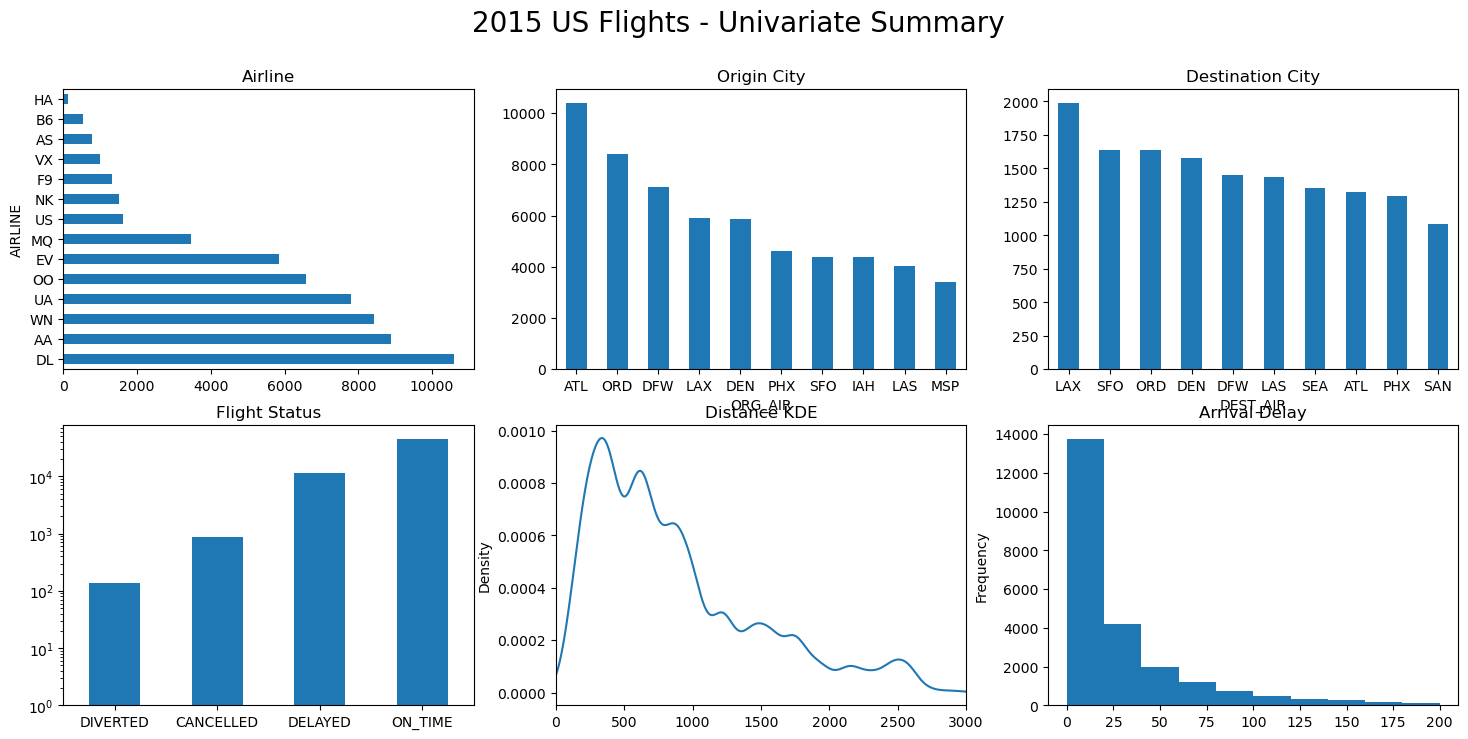

In [47]:
fig, ax_array = plt.subplots(2, 3, figsize=(18,8))
(ax1, ax2, ax3), (ax4, ax5, ax6) = ax_array
fig.suptitle('2015 US Flights - Univariate Summary', size=20)

ac = flights['AIRLINE'].value_counts()
ac.plot(kind='barh', ax=ax1, title='Airline')

oc = flights['ORG_AIR'].value_counts()
oc.plot(kind='bar', ax=ax2, rot=0, title='Origin City')

dc = flights['DEST_AIR'].value_counts().head(10)
dc.plot(kind='bar', ax=ax3, rot=0, title='Destination City')

status.plot(kind='bar', ax=ax4, rot=0, 
                log=True, title='Flight Status')
flights['DIST'].plot(kind='kde', ax=ax5, xlim=(0, 3000),
                         title='Distance KDE')
flights['ARR_DELAY'].plot(kind='hist', ax=ax6, 
                              title='Arrival Delay',
                              range=(0,200))

This is not an exhaustive look at all the univariate statistics but gives us a good amount of detail on some of the variables. Before we move on to multivariate plots, let's plot the number of flights per week. This is the right situation to use a time series plot with the dates on the x axis. Unfortunately, we don't have pandas Timestamps in any of the columns, but we do have the month and day. The to_datetime function has a nifty trick that identifies column names that match Timestamp components. For instance, if you have a DataFrame with exactly three columns titled year, month, and day, then passing this DataFrame to the to_datetime function will return a sequence of Timestamps. To prepare our current DataFrame, we need to add a column for the year and use the scheduled departure time to get the hour and minute:

In [48]:
hour = flights['SCHED_DEP'] // 100
minute = flights['SCHED_DEP'] % 100
df_date = flights[['MONTH', 'DAY']].assign(YEAR=2015, HOUR=hour,
                                               MINUTE=minute)
df_date.head()

,MONTH,DAY,YEAR,HOUR,MINUTE
0,1,1,2015,16,25
1,1,1,2015,8,23
2,1,1,2015,13,5
3,1,1,2015,15,55
4,1,1,2015,17,20


Then, almost by magic, we can turn this DataFrame into a proper Series of Timestamps with the to_datetime function:

In [49]:
flight_dep = pd.to_datetime(df_date)
flight_dep.head()

0   2015-01-01 16:25:00
1   2015-01-01 08:23:00
2   2015-01-01 13:05:00
3   2015-01-01 15:55:00
4   2015-01-01 17:20:00
dtype: datetime64[ns]

Let's use this result as our new index and then find the count of flights per week with the resample method

<Axes: title={'center': 'Flights per Week'}>

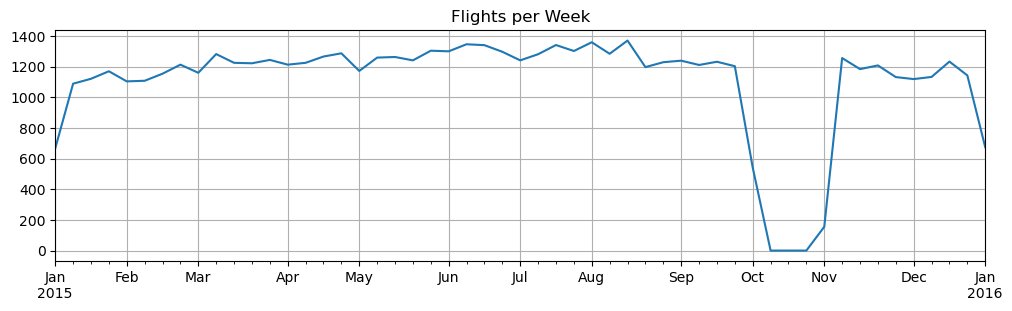

In [50]:
flights.index = flight_dep
fc = flights.resample('W').size()
fc.plot(figsize=(12,3), title='Flights per Week', grid=True)

This plot is quite revealing. It appears that we have no data for the month of October. Due to this missing data, it's quite difficult to analyze any trend visually, if one exists. The first and last weeks are also lower than normal, likely because there isn't a full week of data for them. Let's make any week of data with fewer than 1,000 flights missing. Then, we can use the interpolate method to fill in this missing data:

Text(0.5, 1.0, 'Flights per Week (Interpolated Missing Data)')

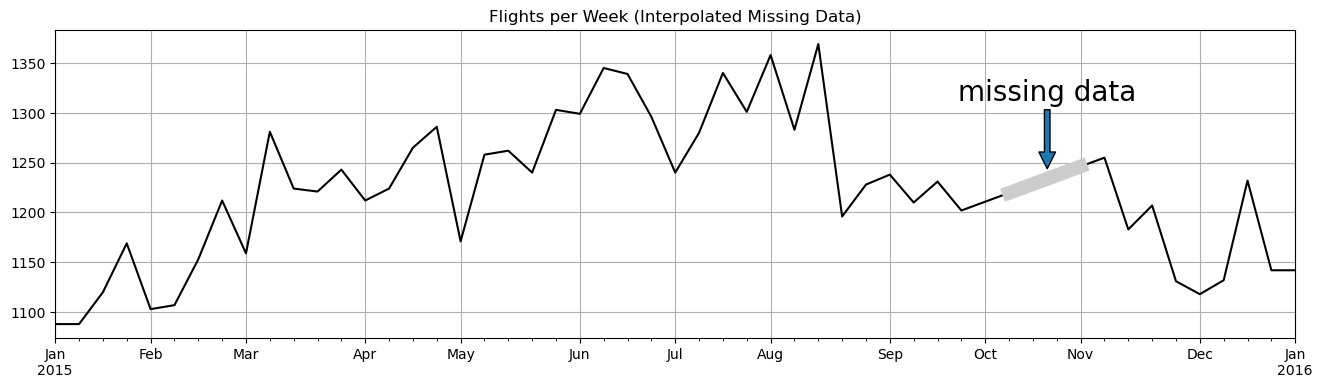

In [52]:
fc_miss = fc.where(fc > 1000)
fc_intp = fc_miss.interpolate(limit_direction='both')

ax = fc_intp.plot(color='black', figsize=(16,4))
fc_intp[fc < 500].plot(linewidth=10, grid=True, 
                           color='.8', ax=ax)

ax.annotate(xy=(.8, .55), xytext=(.8, .77), 
                xycoords='axes fraction', text='missing data', 
                ha='center', size=20, arrowprops=dict())
ax.set_title('Flights per Week (Interpolated Missing Data)')

Let's change directions and focus on multivariable plotting. Let's find the 10 airports that:
* Have the longest average distance traveled for inbound flights
* Have a minimum of 100 total flights:

<Axes: title={'center': 'Average Distance per Destination'}, xlabel='DEST_AIR'>

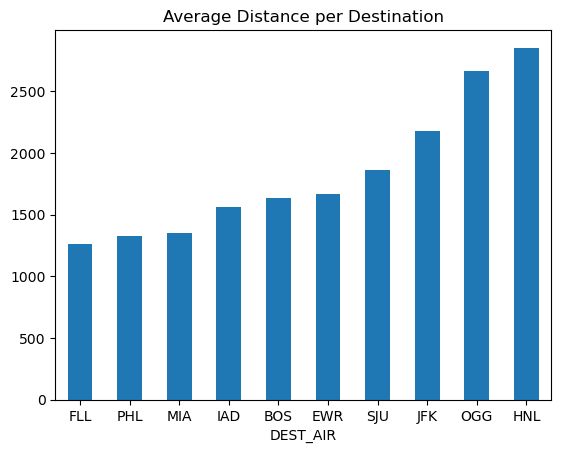

In [53]:
flights.groupby('DEST_AIR')['DIST'] \
           .agg(['mean', 'count']) \
           .query('count > 100') \
           .sort_values('mean') \
           .tail(10) \
           .plot(kind='bar', y='mean', rot=0, legend=False,
                 title='Average Distance per Destination')

It's no surprise that the top two destination airports are in Hawaii. Now let's analyze two variables at the same time by making a scatter plot between distance and airtime for all flights under 2,000 miles:


<Axes: xlabel='DIST', ylabel='AIR_TIME'>

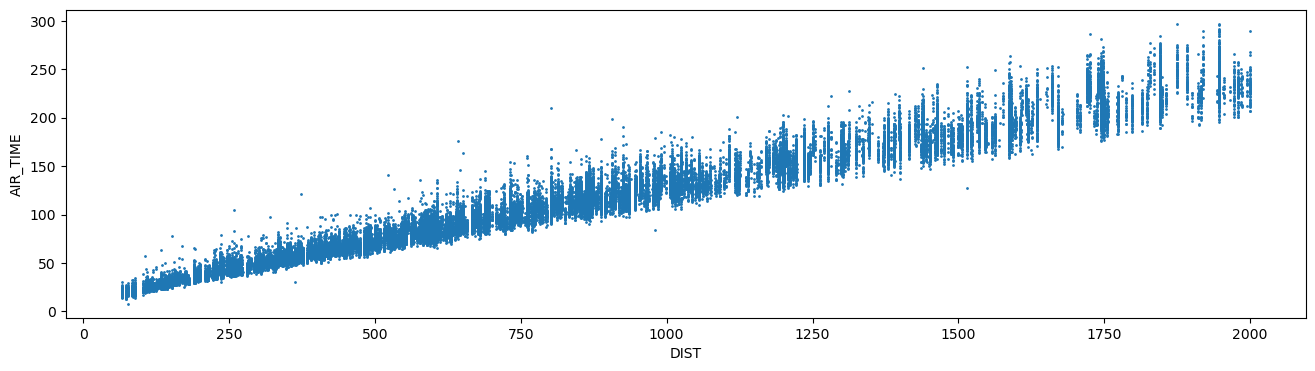

In [54]:
fs = flights.reset_index(drop=True)[['DIST', 'AIR_TIME']] \
                .query('DIST <= 2000').dropna()
fs.plot(x='DIST', y='AIR_TIME', kind='scatter',
            s=1, figsize=(16,4))


As expected, a tight linear relationship exists between distance and airtime, though the variance seems to increase as the number of miles increases. There are a few flights that are quite far outside the trendline. Let's try and identify them. A linear regression model may be used to formally identify them, but as pandas doesn't directly support linear regression, we will take a more manual approach. Let's use the cut function to place the flight distances into one of eight groups:

In [55]:
fs['DIST_GROUP'] = pd.cut(fs['DIST'], bins=range(0, 2001, 250))
fs['DIST_GROUP'].value_counts().sort_index()

DIST_GROUP
(0, 250]         6529
(250, 500]      12631
(500, 750]      11506
(750, 1000]      8832
(1000, 1250]     5071
(1250, 1500]     3198
(1500, 1750]     3885
(1750, 2000]     1815
Name: count, dtype: int64

We will assume that all flights within each group should have similar flight times, and thus calculate for each flight the number of standard deviations if the flight time deviates from the mean of that group:

In [56]:
normalize = lambda x: (x - x.mean()) / x.std()
fs['TIME_SCORE'] = fs.groupby('DIST_GROUP')['AIR_TIME'] \
                         .transform(normalize)
fs.head()


C:\Users\Sumanth\AppData\Local\Temp\ipykernel_13500\4055676382.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fs['TIME_SCORE'] = fs.groupby('DIST_GROUP')['AIR_TIME'] \


,DIST,AIR_TIME,DIST_GROUP,TIME_SCORE
0,590,94.0,"(500, 750]",0.490966
1,1452,154.0,"(1250, 1500]",-1.267551
2,641,85.0,"(500, 750]",-0.296749
3,1192,126.0,"(1000, 1250]",-1.211020
4,1363,166.0,"(1250, 1500]",-0.521999


We now need a way to discover the outliers. A box plot provides a nice visual for detecting outliers. Unfortunately, a bug exists when attempting to make a box plot with the plot method, but thankfully, there is a DataFrame boxplot method that works:

Text(0.5, 0.98, '')

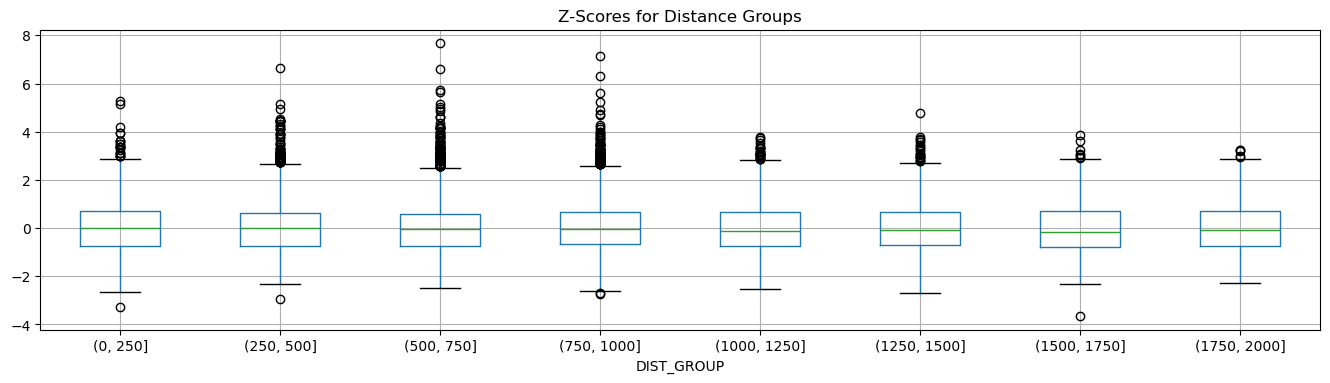

In [57]:
ax = fs.boxplot(by='DIST_GROUP', column='TIME_SCORE',
                    figsize=(16,4))
ax.set_title('Z-Scores for Distance Groups')
ax.figure.suptitle('')

Let's arbitrarily choose to examine the points that are greater than six standard deviations away from the mean. Because we reset the index in the fs DataFrame in step 9, we can use it to identify each unique row in the flights DataFrame. Let's create a separate DataFrame with just the outliers:

In [58]:
outliers = flights.iloc[fs[fs['TIME_SCORE'] > 6].index]
outliers = outliers[['AIRLINE','ORG_AIR', 'DEST_AIR', 'AIR_TIME',
                         'DIST', 'ARR_DELAY', 'DIVERTED']]
outliers['PLOT_NUM'] = range(1, len(outliers) + 1)
outliers

,AIRLINE,ORG_AIR,DEST_AIR,AIR_TIME,DIST,ARR_DELAY,DIVERTED,PLOT_NUM
2015-04-08 09:40:00,DL,ATL,CVG,121.0,373,54.0,0,1
2015-05-25 16:30:00,F9,MSP,ATL,199.0,907,79.0,0,2
2015-09-10 20:00:00,UA,IAH,MCI,176.0,643,76.0,0,3
2015-12-10 19:53:00,OO,PHX,SFO,164.0,651,146.0,0,4
2015-12-26 09:15:00,NK,ORD,DFW,210.0,802,98.0,0,5


We can use this table to identify the outliers on the plot from step 9. Pandas also provides a way to attach tables to the bottom of the graph:

Text(0.5, 1.0, 'Flight Time vs Distance with Outliers')

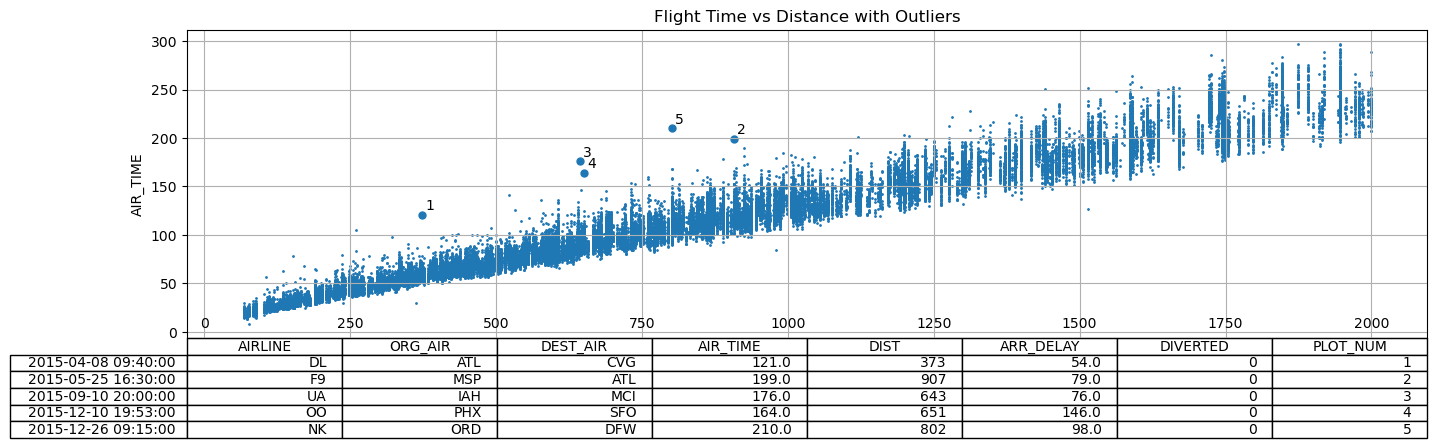

In [59]:
ax = fs.plot(x='DIST', y='AIR_TIME', 
                 kind='scatter', s=1, 
                 figsize=(16,4), table=outliers)
outliers.plot(x='DIST', y='AIR_TIME',
                  kind='scatter', s=25, ax=ax, grid=True)

outs = outliers[['AIR_TIME', 'DIST', 'PLOT_NUM']]
for t, d, n in outs.itertuples(index=False):
    ax.text(d + 5, t + 5, str(n))

plt.setp(ax.get_xticklabels(), y=.1)
plt.setp(ax.get_xticklines(), visible=False)
ax.set_xlabel('')
ax.set_title('Flight Time vs Distance with Outliers')

### How it works...

After reading in our data in step 1 and calculating columns for delayed and on-time flights, we are ready to begin making univariate plots. The call to the subplots function in step 3 creates a 2 x 3 grid of equal-sized Axes. We unpack each Axes into its own variable to reference it. Each of the calls to the plot method references the specific Axes in the Figure with the ax parameter. The value_counts method is used to create the three Series that form the plots in the top row. The rot parameter rotates the tick labels to the given angle.

The plot in the bottom left-hand corner uses a logarithmic scale for the y axis, as the number of on-time flights is about two orders of magnitude greater than the number of cancelled flights. Without the log scale, the left two bars would be difficult to see. By default, KDE plots may result in positive areas for impossible values, such as negative miles in the plot on the bottom row. For this reason, we limit the range of the x values with the xlim parameter.

The histogram created in the bottom right-hand corner on arrival delays was passed the range parameter. This is not directly part of the method signature of the pandas plot method. Instead, this parameter gets collected by the **kwds argument and then passed along to the matplotlib hist function. Using xlim, as done in the previous plot would not work in this case.The plot would simply be cropped without recalculating the new bin widths for just that portion of the graph. The range parameter, however, both limits the x-axis and calculates the bin widths for just that range.

Step 4 creates a special extra DataFrame to hold columns with only datetime components so that we can instantly turn each row into a Timestamp with the to_datetime function in step 5. The resample method, by default, uses the index to form groups based on the date offset passed. We return the number of flights per week (W) as a Series and then call the plot method on it, which nicely formats the index as the x-axis. A glaring hole for the month of October appears.

To fill this hole, we use the where method to set only value less than 1,000 to missing in the first line of step 7. We then fill in the missing data through linear interpolation. By default, the interpolate method only interpolates in a forward direction, so any missing values at the start of the DataFrame will remain. By setting the limit_direction parameter to both, we ensure that there are no missing values. The new data, now stored in fc_intp, is plotted. To show the missing data more clearly, we select the points that were missing from the original and make a line plot on the same Axes directly on top of the previous line. Typically, when we annotate the plot, we can use the data coordinates, but in this instance, it isn't obvious what the coordinates of the x-axis are. To use the Axes coordinate system (the one that ranges from (0,0), to (1,1)), the xycoords parameter is set to axes fraction. This new plot now excludes the erroneous data and it makes it is much easier to spot a trend. The summer months have much more air traffic than any other time of the year.

In step 8, we use a long chain of methods to group by each destination airport and apply two functions, mean and count, to the distance column. The query method is especially nice when for use in a method chain, as it clearly and succinctly selects the desired rows of data of a given condition. We have two columns in our DataFrame when we get to the plot method, which, by default, would make a bar plot for each column. We are not interested in the count column and therefore select only the mean column to form the bars. Also, when plotting with a DataFrame, each column name appears in the legend. This would put the word mean in the legend, which would not be useful, so we remove it by setting the legend parameter to False.

Step 9 begins a new analysis by looking at the relationship between distance traveled and flight airtime. Due to the huge number of points, we shrink their size with the s parameter. To find the flights that took much longer on average to reach their destination, we group each flight into 250 mile chunks in step 10 and find the number of standard deviations from their group mean in step 11.

In step 12, a new box plot is created in the same Axes for every unique value of the by parameter. We capture the Axes object by saving it to a variable after the call to boxplot. This method creates an unnecessary title over the Figure, which is erased by first accessing the Figure and then setting the suptitle to an empty string.

In step 13, the current DataFrame, fs, contains the information we need to find the slowest flights, but it does not possess all of the original data that we might want to investigate further. Because we reset the index of fs in step 9, we can use it to identify the same row from the original. The first line in this step does this for us. We also give each of the outlier rows a unique integer to identify it later on when plotting.

In step 14, we begin with the same scatter plot as in step 9 but use the table parameter to append the outlier table to the bottom of the plot. We then plot our outliers as a scatter plot directly on top and ensure that their points are larger to identify them easily. The itertuples method loops through each DataFrame row and returns its values as a tuple. We unpack the corresponding x and y values for our plot and label it with the number we assigned to it.

As the table is placed directly underneath of the plot, it interferes with the plotting objects on the x axis. We move the tick labels to the inside of the axis and remove the tick lines and axis label. This table provides some nice information to anyone who is interested in these outlying events.

# Stacking area charts to discover emerging trends
Stacked area charts are great visualizations to discover emerging trends, especially in the marketplace. It is a common choice to show the percentage of the market share for things such as internet browsers, cell phones, or vehicles.

### Getting ready

In this recipe, we will use data gathered from the popular website meetup.com. Using a stacked area chart, we will show membership distribution between five data science-related meetup groups.

### How to do it...

Read in the meetup dataset, convert the join_date column into a Timestamp, place it in the index, and output the first five rows:

In [61]:
meetup = pd.read_csv('data/meetup_groups.csv', 
                     parse_dates=['join_date'], 
                     index_col='join_date')
meetup.head()

,group,city,state,country
join_date,,,,
2016-11-18 02:41:29,houston machine learning,Houston,TX,us
2017-05-09 14:16:37,houston machine learning,Houston,TX,us
2016-12-30 02:34:16,houston machine learning,Houston,TX,us
2016-07-18 00:48:17,houston machine learning,Houston,TX,us
2017-05-25 12:58:16,houston machine learning,Houston,TX,us


Let's get the number of people who joined each group each week:

In [62]:
group_count = meetup.groupby([pd.Grouper(freq='W'), 'group']).size()
group_count.head()

join_date   group   
2010-11-07  houstonr     5
2010-11-14  houstonr    11
2010-11-21  houstonr     2
2010-12-05  houstonr     1
2011-01-16  houstonr     2
dtype: int64

Unstack the group level so that each meetup group has its own column of data:

In [63]:
gc2 = group_count.unstack('group', fill_value=0)
gc2.tail()

group,houston data science,houston data visualization,houston energy data science,houston machine learning,houstonr
join_date,,,,,
2017-09-17,16,2,6,5,0
2017-09-24,19,4,16,12,7
2017-10-01,20,6,6,20,1
2017-10-08,22,10,10,4,2
2017-10-15,14,13,9,11,2


This data represents the number of members who joined that particular week. Let's take the cumulative sum of each column to get the grand total number of members:

In [64]:
group_total = gc2.cumsum()
group_total.tail()

group,houston data science,houston data visualization,houston energy data science,houston machine learning,houstonr
join_date,,,,,
2017-09-17,2105,1708,1886,708,1056
2017-09-24,2124,1712,1902,720,1063
2017-10-01,2144,1718,1908,740,1064
2017-10-08,2166,1728,1918,744,1066
2017-10-15,2180,1741,1927,755,1068


Many stacked area charts use the percentage of the total so that each row always adds up to 100 percent. Let's divide each row by the row total to find this percentage:

In [65]:
row_total = group_total.sum(axis='columns')
group_cum_pct = group_total.div(row_total, axis='index')
group_cum_pct.tail()

group,houston data science,houston data visualization,houston energy data science,houston machine learning,houstonr
join_date,,,,,
2017-09-17,0.282058,0.228862,0.252713,0.094868,0.141498
2017-09-24,0.282409,0.227629,0.252892,0.095732,0.141338
2017-10-01,0.283074,0.226829,0.251914,0.097703,0.140481
2017-10-08,0.284177,0.226712,0.251640,0.097612,0.139858
2017-10-15,0.284187,0.226959,0.251206,0.098423,0.139226


We can now create our stacked area plot, which will continually accumulate the columns, one on top of the other:

Text(0.86, 0.78, 'Machine Learning')

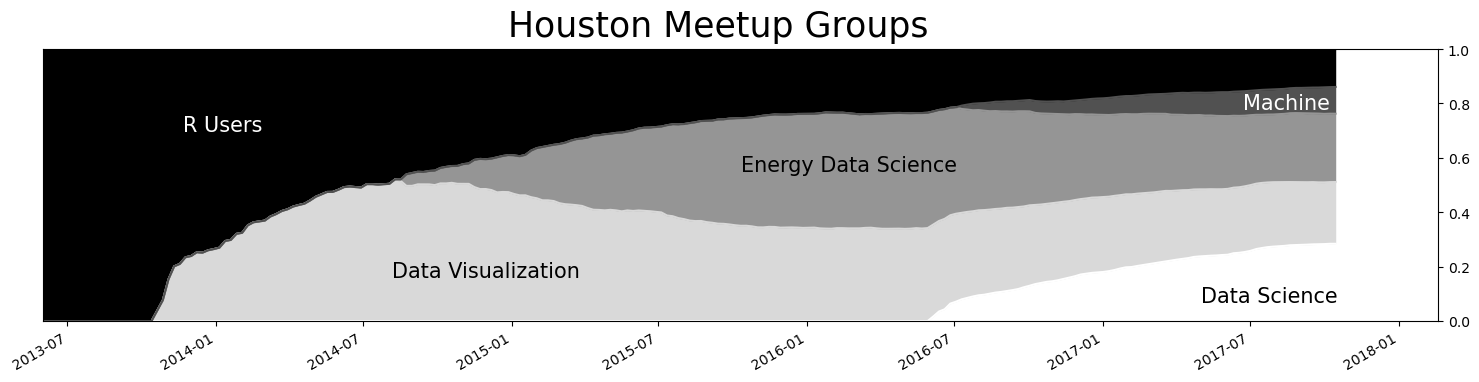

In [68]:
ax = group_cum_pct.plot(kind='area', figsize=(18,4),
                        cmap='Greys', xlim=('2013-6', None), 
                        ylim=(0, 1), legend=False)
ax.figure.suptitle('Houston Meetup Groups', size=25)
ax.set_xlabel('')
ax.yaxis.tick_right()

plot_kwargs = dict(xycoords='axes fraction', size=15)
ax.annotate(xy=(.1, .7), text='R Users', color='w', **plot_kwargs)
ax.annotate(xy=(.25, .16), text='Data Visualization', color='k', **plot_kwargs)
ax.annotate(xy=(.5, .55), text='Energy Data Science', color='k', **plot_kwargs)
ax.annotate(xy=(.83, .07), text='Data Science', color='k', **plot_kwargs)
ax.annotate(xy=(.86, .78), text='Machine Learning', color='w', **plot_kwargs)

### How it works...

Our goal is to determine the distribution of members among the five largest data science meetup groups in Houston over time. To do this, we need to find the total membership at every point in time since each group began. We have the exact date and time when each person joined each group. In step 2, we group by each week (offset alias W) and meetup group and return the number of sign-ups for that week with the size method.

The resulting Series is not suitable to make plots with pandas. Each meetup group needs its own column, so we reshape the group index level as columns. We set the option fill_value to zero so that groups with no memberships during a particular week will not have missing values.

We are in need of the total number of members each week. The cumsum method in step 4 provides this for us. We could create our stacked area plot directly after this step, which would be a nice way to visualize the raw total membership. In step 5, we find the distribution of each group as a percentage of the total members in all groups by dividing each value by its row total. By default, pandas automatically aligns objects by their columns, so we cannot use the division operator. Instead, we must use the div method to change the axis of alignment to the index

The data is now perfectly suited for a stacked area plot, which we create in step 6. Notice that pandas allows you to set the axis limits with a datetime string. This will not work if done directly in matplotlib using the ax.set_xlim method. The starting date for the plot is moved up a couple years because the Houston R Users group began much earlier than any of the other groups.

### There's more...

Although typically frowned upon by data visualization gurus, pandas can create pie charts. In this instance, we use them to see snapshots of the total group distribution over time. Let's first select every third month of data, beginning 18 months prior to the end of data collection. We use the asfreq method, which only works on DataFrames with datetime values in the index. The offset alias 3MS is used to represent the start of every third month. Because group_cum_pct is aggregated by week, the first day of the month is not always present. We set the method parameter to bfill, which stands for backfill; it will look back in time to find the first day of the month that has data in it. We then use the to_period method (which also only works with datetimes in the index) to change the values in the index to a pandas period of time. Finally, we transpose the data so that each column represents the distribution of members in the meetup group for that month:



In [69]:
pie_data = group_cum_pct.asfreq('3MS', method='bfill') \
                        .tail(6).to_period('M').T
pie_data

join_date,2016-06,2016-09,2016-12,2017-03,2017-06,2017-09
group,,,,,,
houston data science,0.016949,0.110375,0.171245,0.212289,0.244033,0.280162
houston data visualization,0.337827,0.306052,0.277244,0.261103,0.242085,0.230332
houston energy data science,0.416025,0.354467,0.312271,0.288859,0.267576,0.253758
houston machine learning,0.000000,0.037176,0.051969,0.071593,0.087839,0.093026
houstonr,0.229199,0.191931,0.187271,0.166156,0.158467,0.142722


From here, we can use the plot method to create the pie charts:



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


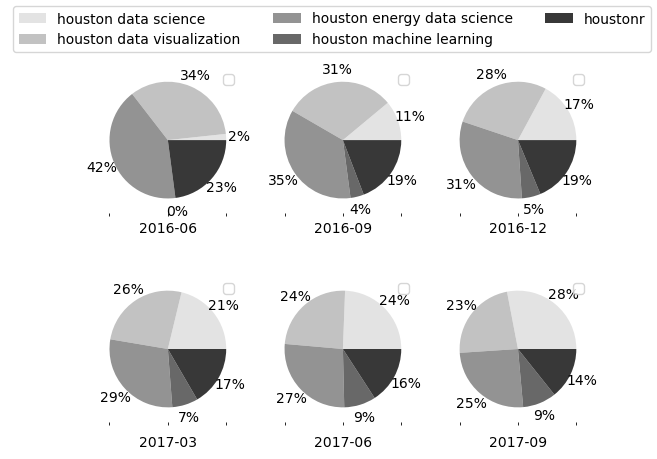

In [70]:
from matplotlib.cm import Greys
greys = Greys(np.arange(50,250,40))

ax_array = pie_data.plot(kind='pie', subplots=True, 
                         layout=(2,3), labels=None,
                         autopct='%1.0f%%', pctdistance=1.22,
                         colors=greys)
ax1 = ax_array[0, 0]
ax1.figure.legend(ax1.patches, pie_data.index, ncol=3)
for ax in ax_array.flatten():
    ax.xaxis.label.set_visible(True)
    ax.set_xlabel(ax.get_ylabel())
    ax.set_ylabel('')
ax1.figure.subplots_adjust(hspace=.3)

# Understanding the differences between seaborn and pandas

Outside of pandas, the seaborn library is one of the most popular in the Python data science community to create visualizations. Like pandas, it does not do any actual plotting itself and is completely reliant on matplotlib for the heavy lifting. Seaborn plotting functions work directly with pandas DataFrames to create aesthetically pleasing visualizations.

While seaborn and pandas both reduce the overhead of matplotlib, the way they approach data is completely different. Nearly all of the seaborn plotting functions require tidy (or long) data. When data is in tidy form, it is not ready for consumption or interpretation until some function is applied to it to yield a result. Tidy data is the raw building blocks that makes all other analysis possible. Processing tidy data during data analysis often creates aggregated or wide data. This data, in wide format, is what pandas uses to make its plots.

### Getting ready

In this recipe, we will build similar plots with both seaborn and matplotlib to show definitively that they accept tidy versus wide data.

### How to do it...

Read in the employee dataset, and output the first five rows:

In [71]:
employee = pd.read_csv('data/employee.csv', 
                       parse_dates=['HIRE_DATE', 'JOB_DATE'])
employee.head()

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE
0,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2006-06-12,2012-10-13
1,1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,2000-07-19,2010-09-18
2,2,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Full Time,Male,Active,2015-02-03,2015-02-03
3,3,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,White,Full Time,Male,Active,1982-02-08,1991-05-25
4,4,ELECTRICIAN,General Services Department,56347.0,White,Full Time,Male,Active,1989-06-19,1994-10-22


Import the seaborn library, and alias it sns:

In [72]:
import seaborn as sns

Let's make a bar chart of the count of each department with seaborn:

<Axes: xlabel='count', ylabel='DEPARTMENT'>

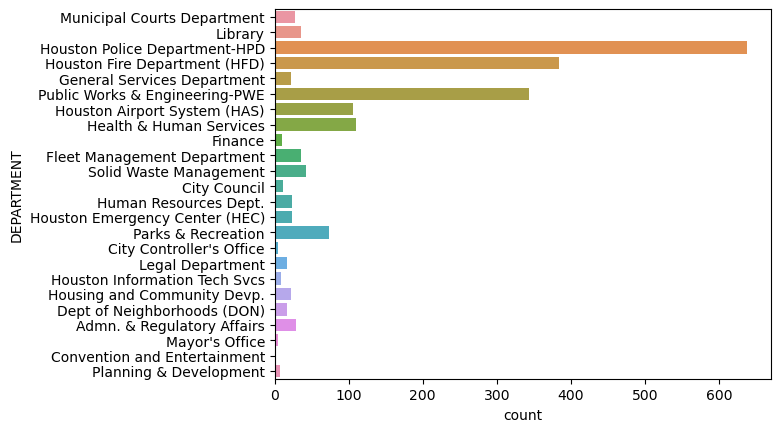

In [73]:
sns.countplot(y='DEPARTMENT', data=employee)

To reproduce this plot with pandas, we will need to aggregate the data beforehand:

<Axes: ylabel='DEPARTMENT'>

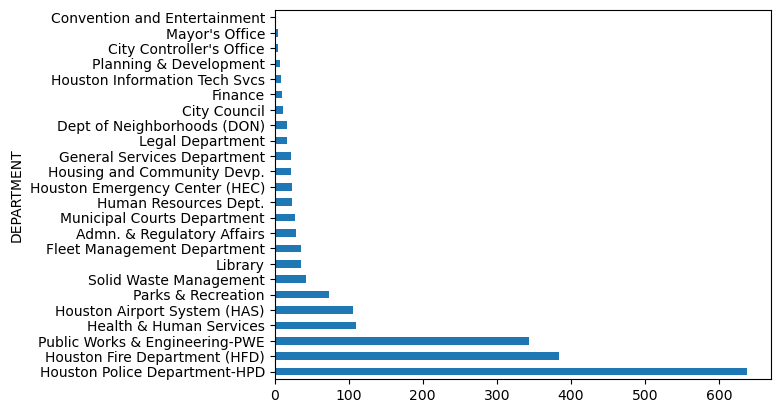

In [75]:
employee['DEPARTMENT'].value_counts().plot(kind='barh')

Now, let's find the average salary for each race with seaborn:

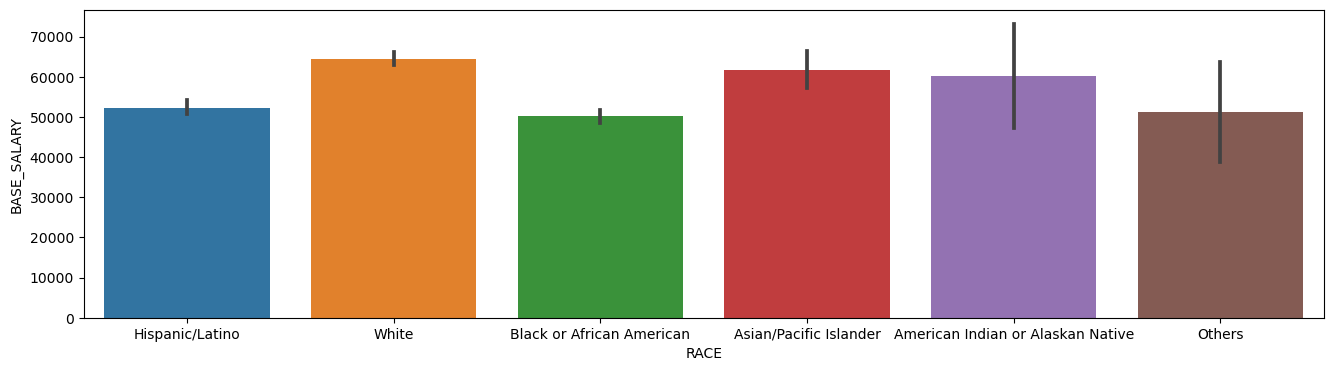

In [76]:
ax = sns.barplot(x='RACE', y='BASE_SALARY', data=employee)
ax.figure.set_size_inches(16, 4)

To replicate this with pandas, we will need to group by each race first:

Text(0, 0.5, 'Mean Salary')

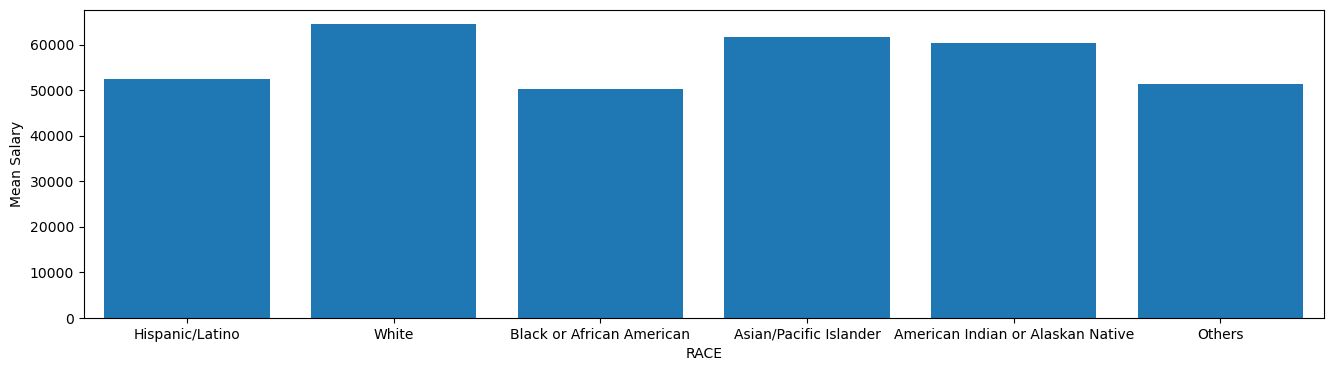

In [77]:
avg_sal = employee.groupby('RACE', sort=False)['BASE_SALARY'].mean()
ax = avg_sal.plot(kind='bar', rot=0, figsize=(16,4), width=.8)
ax.set_xlim(-.5, 5.5)
ax.set_ylabel('Mean Salary')

Seaborn also has the ability to distinguish groups within the data through a third variable, hue, in most of its plotting functions. Let's find the mean salary by race and gender:

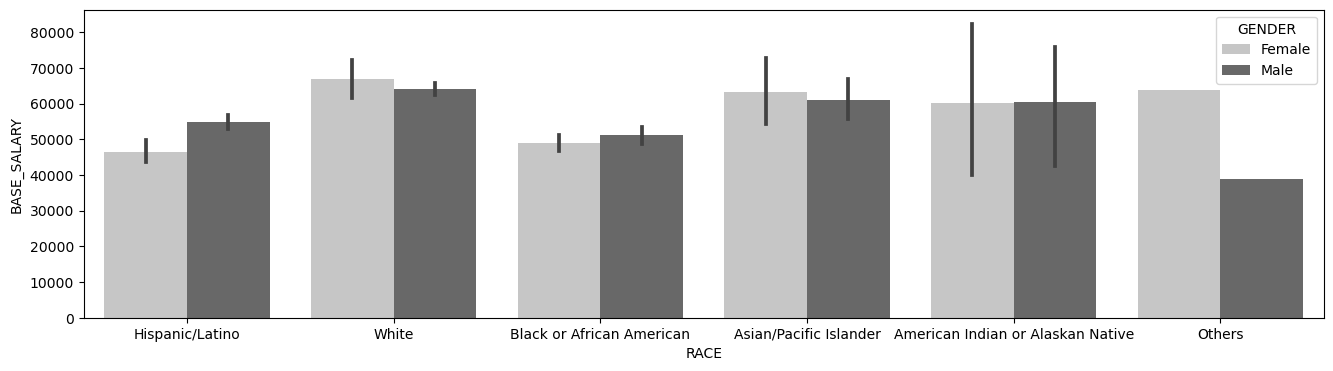

In [78]:
ax = sns.barplot(x='RACE', y='BASE_SALARY', hue='GENDER', 
                 data=employee, palette='Greys')
ax.figure.set_size_inches(16,4)

With pandas, we will have to group by both race and gender and then unstack the genders as column names

<Axes: xlabel='RACE'>

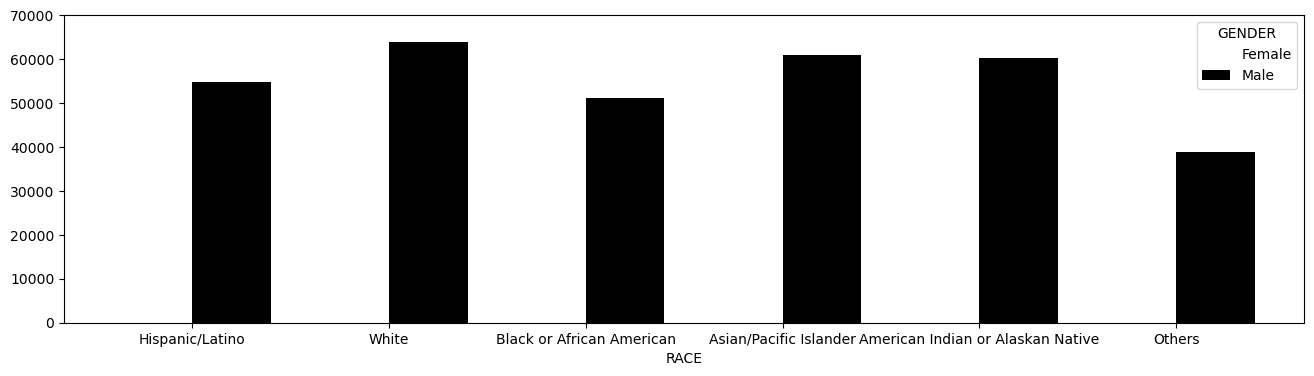

In [79]:
employee.groupby(['RACE', 'GENDER'], sort=False)['BASE_SALARY'] \
        .mean().unstack('GENDER') \
        .plot(kind='bar', figsize=(16,4), rot=0,
              width=.8, cmap='Greys')

A box plot is another type of plot that seaborn and pandas have in common. Let's create a box plot of salary by race and gender with seaborn:

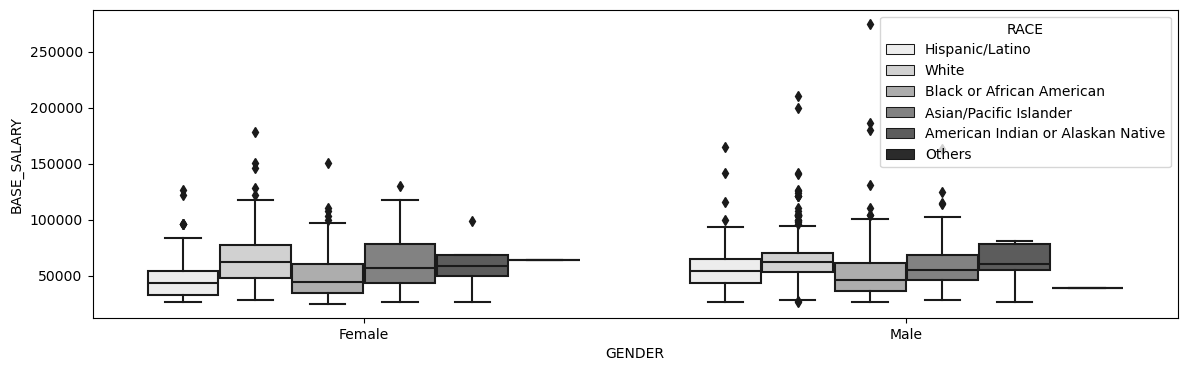

In [80]:
ax = sns.boxplot(x='GENDER', y='BASE_SALARY', data=employee, hue='RACE', palette='Greys')
ax.figure.set_size_inches(14,4)

Pandas is not easily able to produce an exact replication for this box plot. It can create two separate Axes for gender and then make box plots of the salary by race:

Text(0.5, 0.98, '')

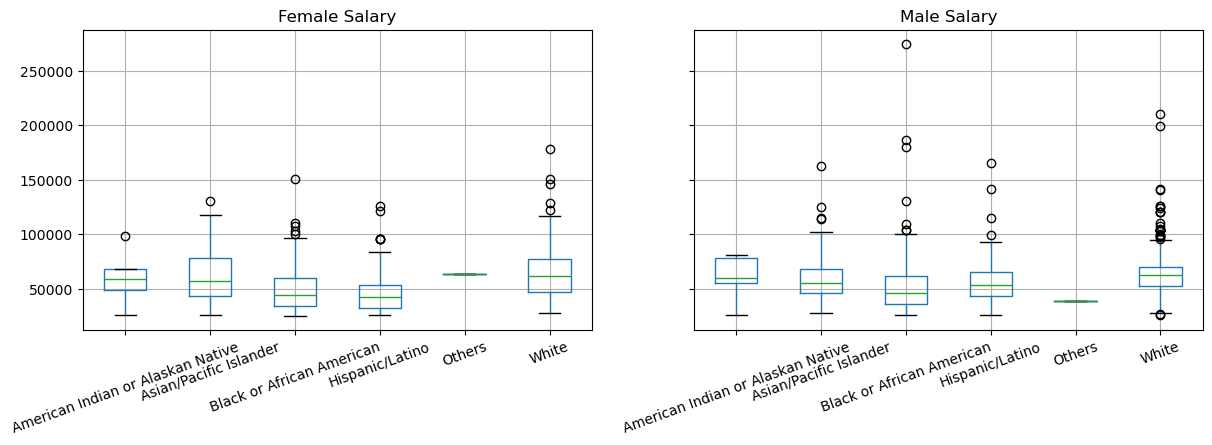

In [81]:
fig, ax_array = plt.subplots(1, 2, figsize=(14,4), sharey=True)
for g, ax in zip(['Female', 'Male'], ax_array):
    employee.query('GENDER== @g') \
            .boxplot(by='RACE', column='BASE_SALARY', ax=ax, rot=20)
    ax.set_title(g + ' Salary')
    ax.set_xlabel('')
fig.suptitle('')

### How it works...

Importing seaborn in step 2 changes many of the default properties of matplotlib. There are about 300 default plotting parameters that can be accessed within the dictionary-like object plt.rcParams. To restore the matplotlib defaults, call the plt.rcdefaults function with no arguments. The style of pandas plots will also be affected when importing seaborn. Our employee dataset meets the requirements for tidy data and thus makes it perfect to use for nearly all seaborn's plotting functions.

Seaborn will do all the aggregation; you just need to supply your DataFrame to the data parameter and refer to the columns with their string names. For instance, in step 3, the countplot function effortlessly counts each occurrence of a DEPARTMENT to create a bar chart. All seaborn plotting functions have x and y parameters. We could have made a vertical bar plot using x instead of y. Pandas forces you to do a bit more work to get the same plot. In step 4, we must precalculate the height of the bins using the value_counts method.

Seaborn is able to do more complex aggregations, as seen in steps 5 and 7, with the barplot function. The hue parameter further splits each of the groups on the x axis. Pandas is capable of nearly replicating these plots by grouping by the x and hue variables in steps 6 and 8.

Box plots are available in both seaborn and pandas and can be plotted directly with tidy data without any aggregation. Even though no aggregation is necessary, seaborn still has the upper hand, as it can split data neatly into separate groups using the hue parameter. Pandas cannot easily replicate this function from seaborn, as seen in step 10. Each group needs to be split with the query method and plotted on its own Axes. It is actually possible for pandas to split on multiple variables, passing a list to the by parameter, but the result is not nearly as elegant:

Text(0.5, 0.98, '')

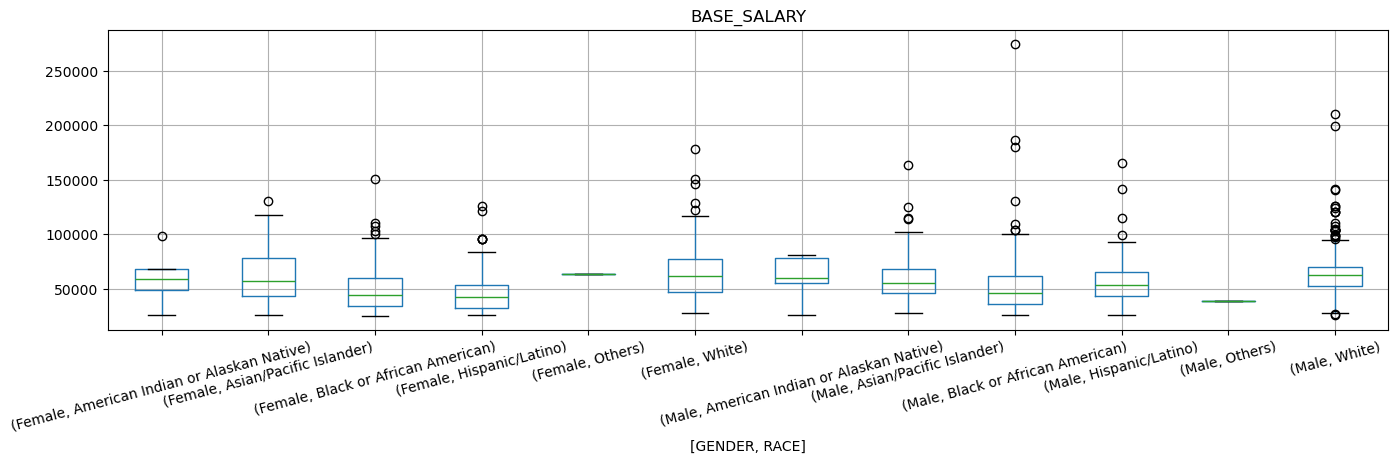

In [82]:
ax = employee.boxplot(by=['GENDER', 'RACE'], 
                      column='BASE_SALARY', 
                      figsize=(16,4), rot=15)
ax.figure.suptitle('')

# Doing multivariate analysis with seaborn grids
To understand seaborn further, it is helpful to be aware of the hierarchy between the functions that return multiple Axes as a seaborn Grid and those that return single Axes:

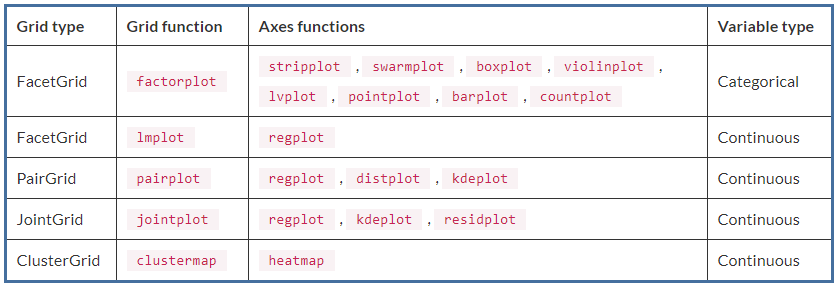

The seaborn Axes functions may all be called independently to produce a single plot. The Grid functions, for the most part, use the Axes functions to build the grid. The final objects returned from the Grid functions are of Grid type, of which there are four different kinds. Advanced use cases necessitate the direct use of Grid types, but the vast majority of the time, you will call the underlying Grid functions to produce the actual Grid and not the constructor itself.

### Getting ready

In this recipe, we will examine the relationship between years of experience and salary by gender and race. We will begin by creating a simple regression plot with a seaborn Axes function and then add more dimensions to the plot with Grid functions.

### How to do it...

Read in the employee dataset, and create a column for years of experience:

In [84]:
employee = pd.read_csv('data/employee.csv', 
                       parse_dates=['HIRE_DATE', 'JOB_DATE'])
days_hired = (pd.to_datetime('12-1-2016') - employee['HIRE_DATE'])

one_year = pd.Timedelta(365, unit='D')
employee['YEARS_EXPERIENCE'] =  days_hired / one_year
employee[['HIRE_DATE', 'YEARS_EXPERIENCE']].head()

,HIRE_DATE,YEARS_EXPERIENCE
0,2006-06-12,10.479452
1,2000-07-19,16.380822
2,2015-02-03,1.827397
3,1982-02-08,34.835616
4,1989-06-19,27.471233


Let's create a basic scatter plot with a fitted regression line to represent the relationship between years of experience and salary:

In [85]:
import seaborn as sns

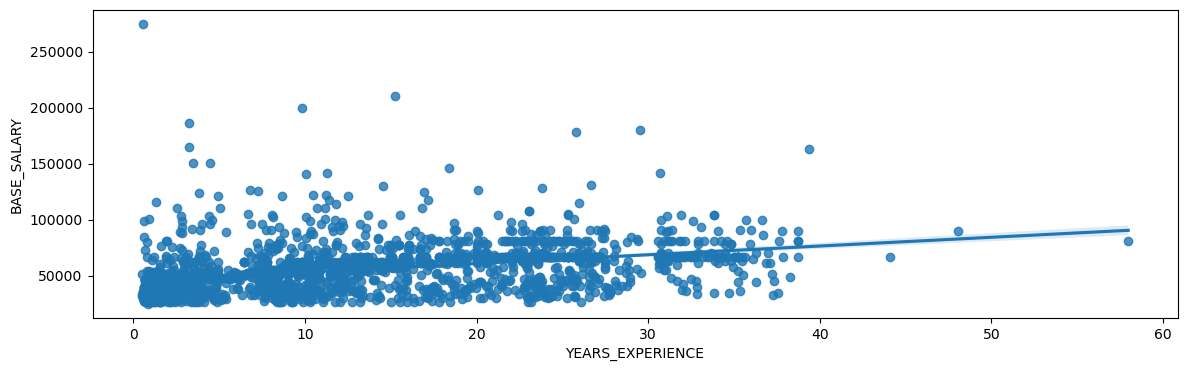

In [86]:
ax = sns.regplot(x='YEARS_EXPERIENCE', y='BASE_SALARY',
                 data=employee)
ax.figure.set_size_inches(14,4)

The regplot function cannot plot multiple regression lines for different levels of a third variable. Let's use its parent function, lmplot, to plot a seaborn Grid that adds the same regression lines for males and females:


seaborn.axisgrid.FacetGrid

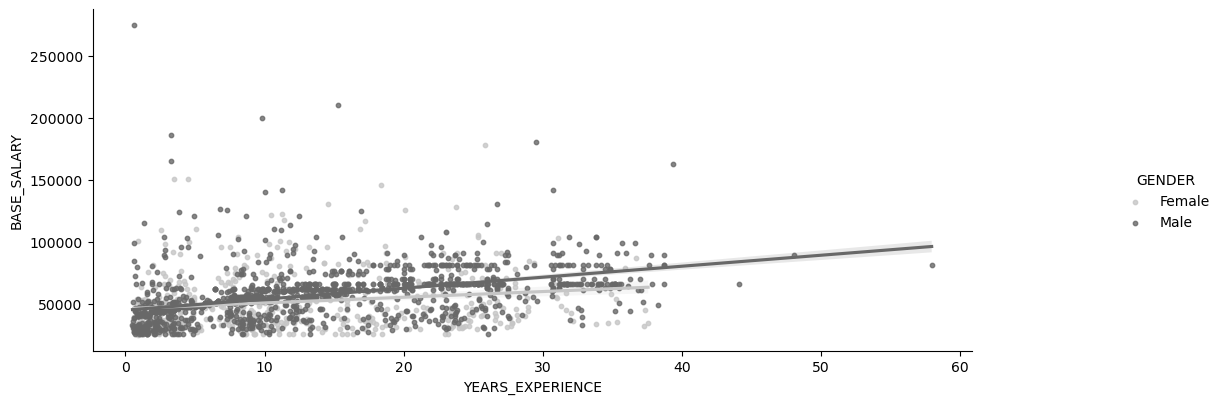

In [87]:
grid = sns.lmplot(x='YEARS_EXPERIENCE', y='BASE_SALARY',
                  hue='GENDER', palette='Greys',
                  scatter_kws={'s':10}, data=employee)
grid.fig.set_size_inches(14, 4)
type(grid)

The real power of the seaborn Grid functions is their ability to add more Axes based on another variable. Each seaborn Grid has the col and row parameters available to divide the data further into different groups. For instance, we can create a separate plot for each unique race in the dataset and still fit the regression lines by gender:

C:\Users\Sumanth\anaconda3\envs\stablediffusion\lib\site-packages\seaborn\regression.py:582: UserWarning: sharex is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


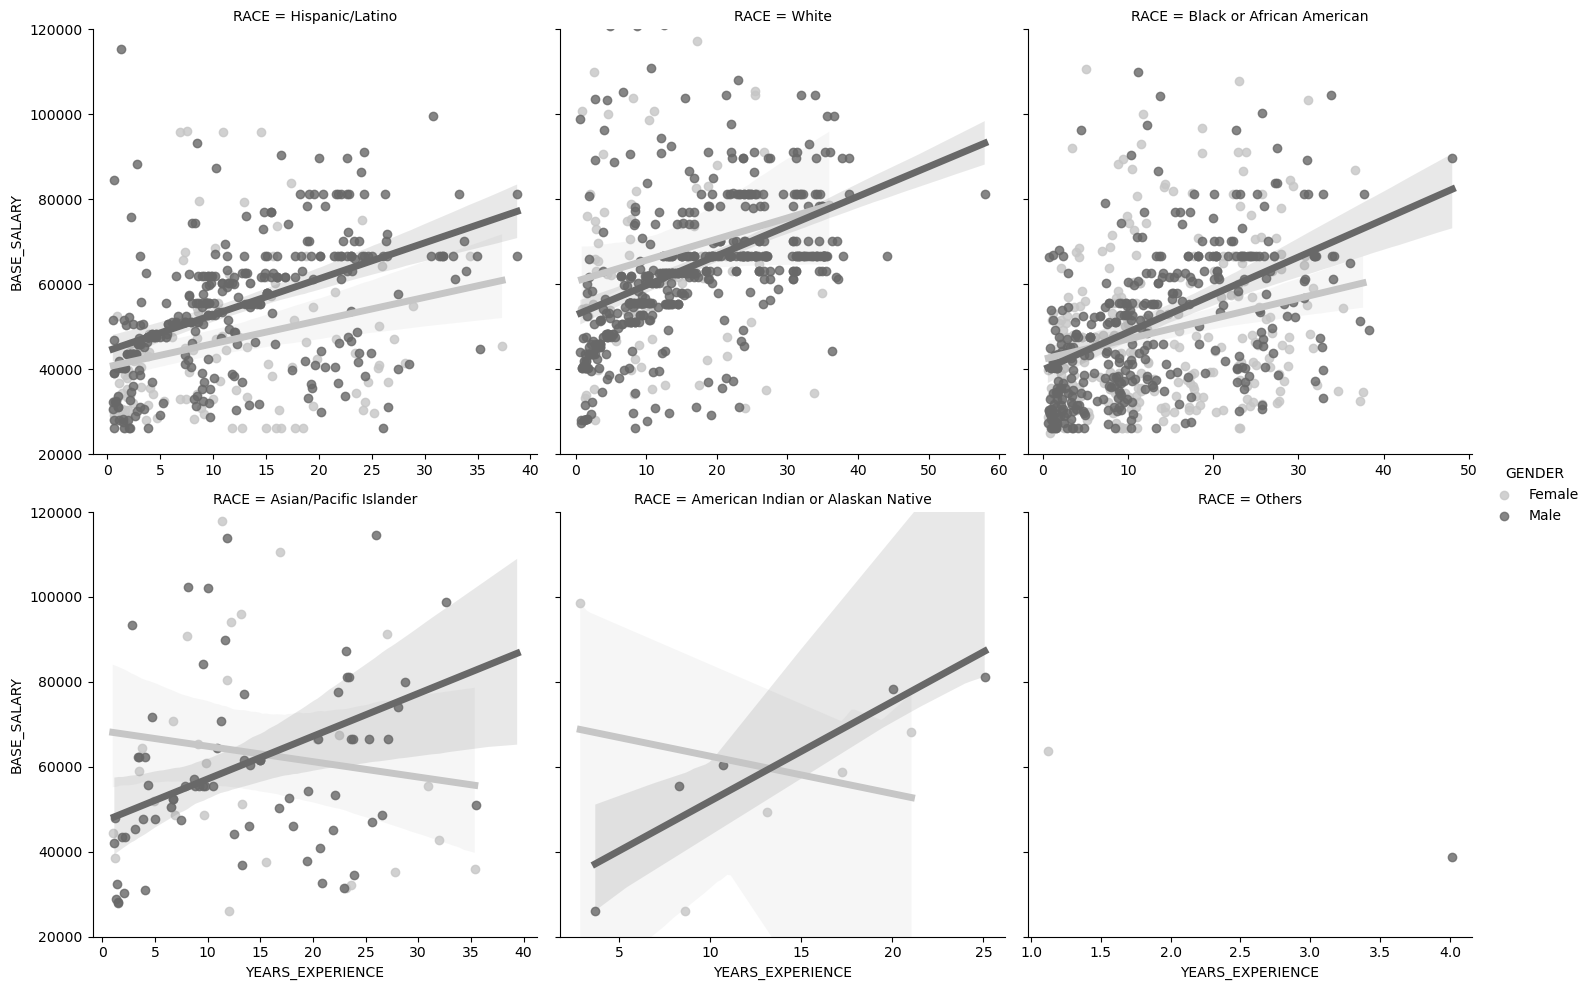

In [88]:
grid = sns.lmplot(x='YEARS_EXPERIENCE', y='BASE_SALARY',
                  hue='GENDER', col='RACE', col_wrap=3,
                  palette='Greys', sharex=False,
                  line_kws = {'linewidth':5},
                  data=employee)
grid.set(ylim=(20000, 120000))

### How it works...

In step 1, we create another continuous variable by using pandas date functionality. This data was collected from the city of Houston on December 1, 2016. We use this date to determine how long each employee has worked for the city. When we subtract dates, as done in the second line of code, we are returned a Timedelta object whose largest unit is days. We could have simply divided this number by 365 to calculate the years of experience. Instead, we use Timedelta(1, unit='Y') to get a more precise measurement, which happens to be 365 days, 5 hours, 42 minutes and 19 seconds if you are counting at home.

Step 2 uses the seaborn Axes function regplot to create a scatter plot with the estimated regression line. It returns an Axes, which we use to change the size of the Figure. In order to create two separate regression lines for each gender, we must use its parent function, lmplot. It contains the hue parameter, which creates a new regression line for each unique value of that variable. At the end of step 3, we verify that lmplot does indeed return a seaborn Grid object.

The seaborn Grid is essentially a wrapper around the entire Figure, with a few convenience methods to alter its elements. All seaborn Grids may access the underlying Figure with their fig attribute. Step 4 shows a common use-case for seaborn Grid functions, which is to create multiple plots based on a third or even fourth variable. We set the col parameter to RACE. Six regression plots are created for each of the six unique races in the dataset. Normally, this would return a grid consisting of 1 row and 6 columns, but we use the col_wrap parameter to limit the number of columns to 3.

There are several more available parameters to control most of the important aspects of the Grid. It is possible to change use parameters from the underlying line and scatter plot matplotlib functions. To do so, set the scatter_kws or the line_kws parameters equal to a dictionary that has the matplotlib parameter as a string paired to the value you want it to be.

### There's more...

We can do a similar type of analysis when we have categorical features. First, let's reduce the number of levels in the categorical variables race and department to the top two and three most common, respectively:

In [89]:
deps = employee['DEPARTMENT'].value_counts().index[:2]
races = employee['RACE'].value_counts().index[:3]
is_dep = employee['DEPARTMENT'].isin(deps)
is_race = employee['RACE'].isin(races)
emp2 = employee[is_dep & is_race].copy()
emp2['DEPARTMENT'] = emp2.DEPARTMENT.str.extract('(HPD|HFD)', expand=True)
emp2.shape

(968, 11)

Let's use one of the simpler Axes-level functions, such as a violin plot to view the distribution of years of experience by gender:

In [90]:
emp2['DEPARTMENT'].value_counts()

DEPARTMENT
HPD    591
HFD    377
Name: count, dtype: int64

In [91]:
emp2['RACE'].value_counts()

RACE
White                        478
Hispanic/Latino              250
Black or African American    240
Name: count, dtype: int64

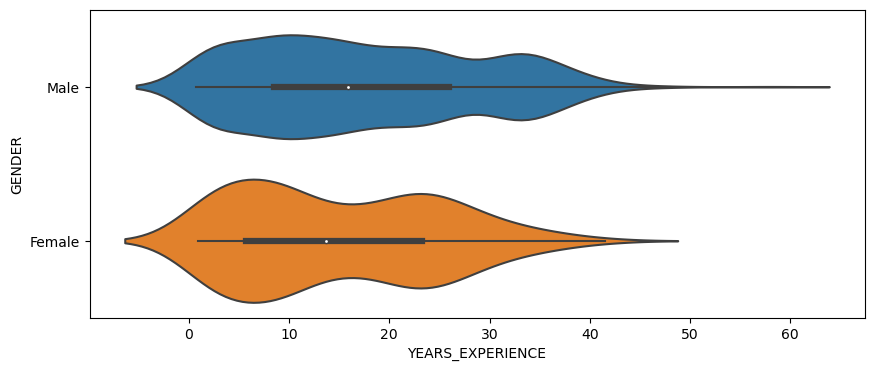

In [92]:
ax = sns.violinplot(x = 'YEARS_EXPERIENCE', y='GENDER', data=emp2)
ax.figure.set_size_inches(10,4)

We can then use the Grid function factorplot to add a violin plot for each unique combination of department and race with the col and row parameters:

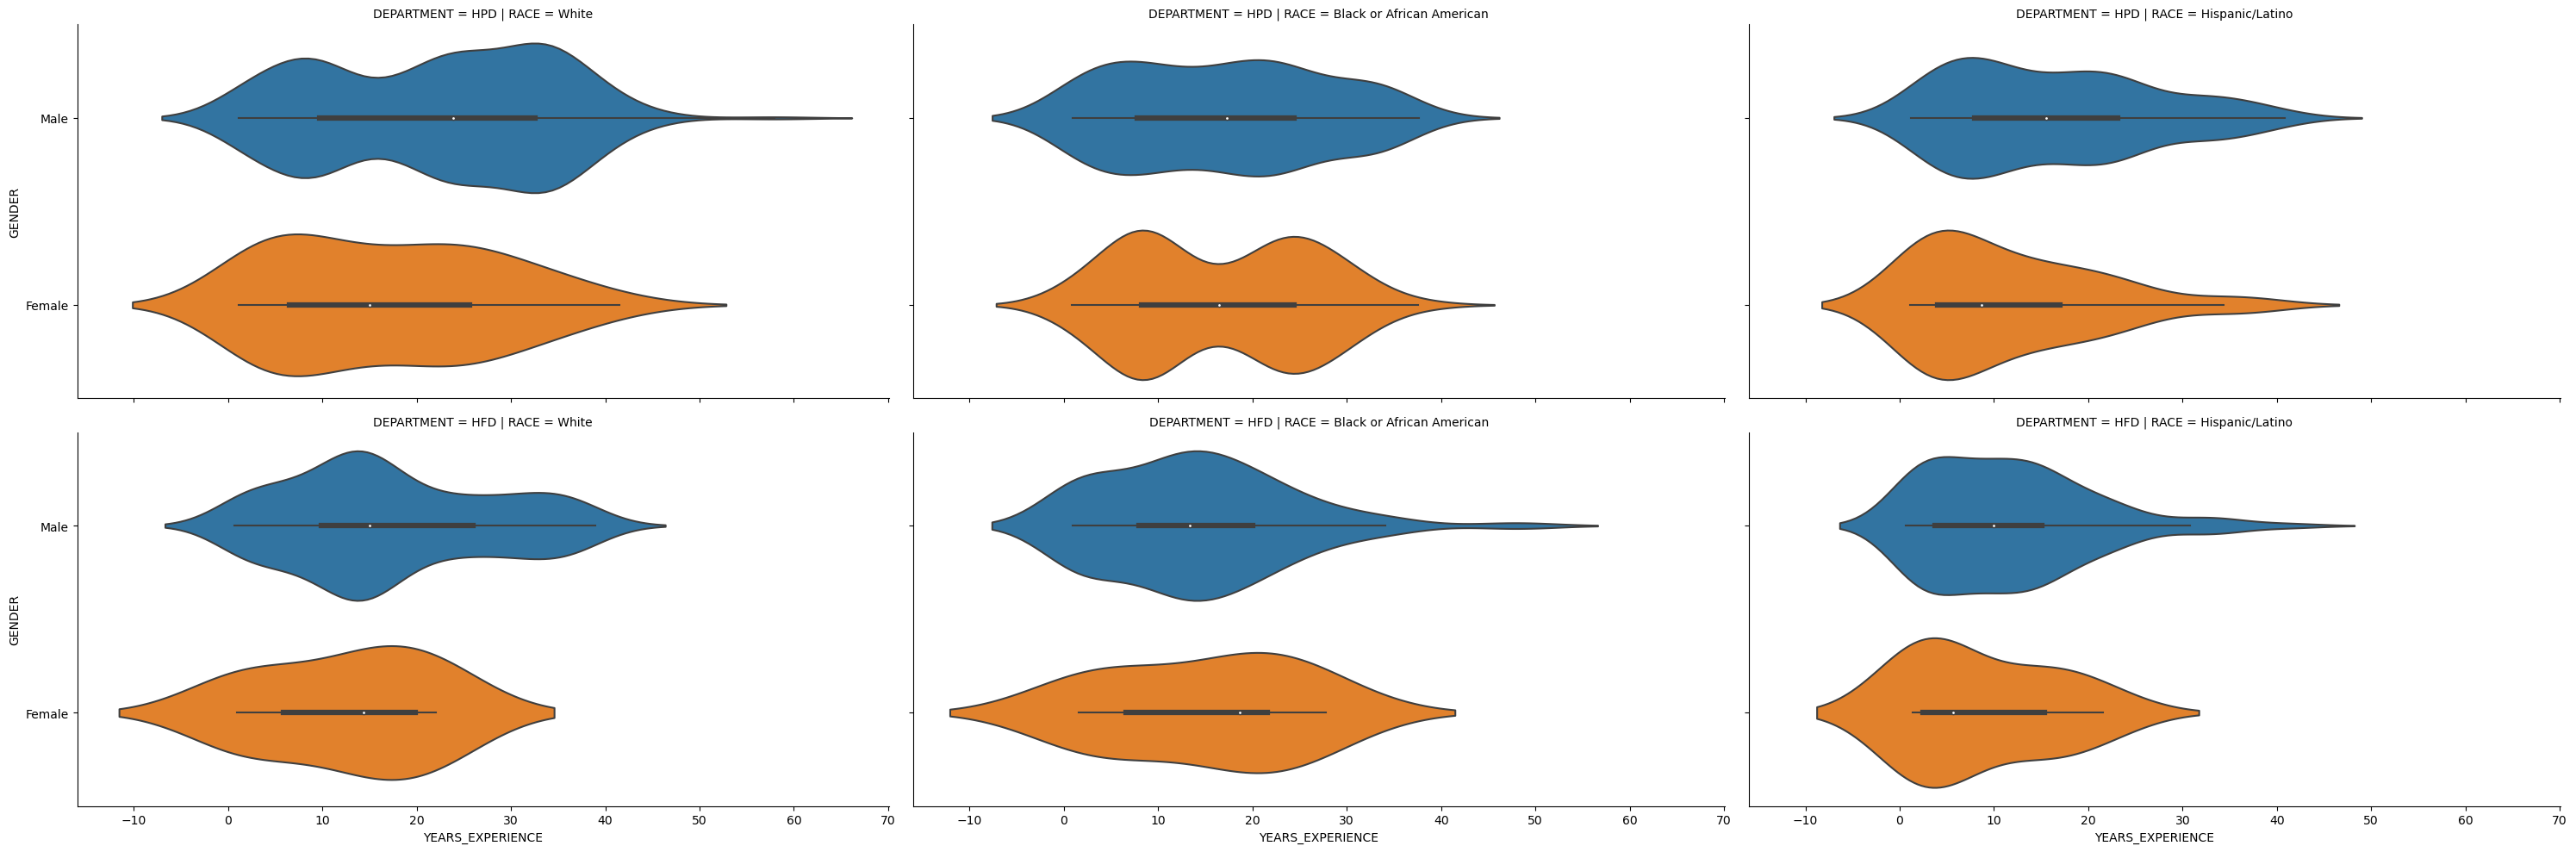

In [94]:
sns.catplot(x ='YEARS_EXPERIENCE', y='GENDER',
               col='RACE', row='DEPARTMENT', 
               size=3, aspect=2,
               data=emp2, kind='violin')

Take a look at the table from the beginning of the recipe. The factorplot function must use one of those eight seaborn Axes functions. To do so, you pass its name as a string to the kind parameter.

# Uncovering Simpson's paradox in the diamonds dataset with seaborn
It is unfortunately quite easy to report erroneous results when doing data analysis. Simpson's paradox is one of the more common phenomena a that can appear in a data analysis. It occurs when one group shows a higher result than another group, when all the data is aggregated, but it shows the opposite when the data is subdivided into different segments. For instance, let's say we have two students, A and B, who have each been given a test with 100 questions on it. Student A answers 50% of the questions correct, while Student B gets 80% correct. This obviously suggests Student B has greater aptitude:

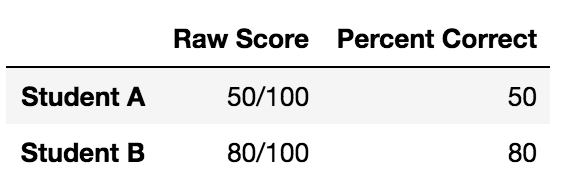

Let's say that the two tests were very different. Student A's test consisted of 95 problems that were difficult and only five that were easy. Student B was given a test with the exact opposite ratio.

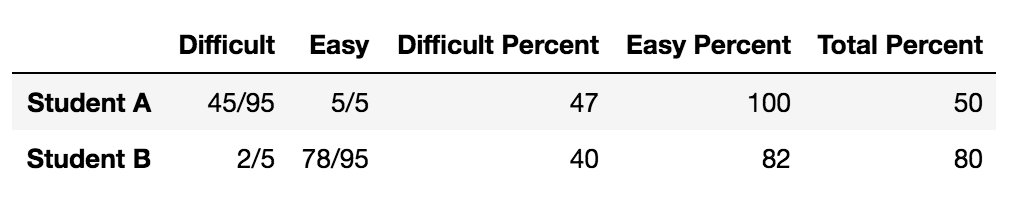

This paints a completely different picture. Student A now has a higher percentage of both the difficult and easy problems but has a much lower percentage as a whole. This is a quintessential example of Simpson's paradox. The aggregated whole shows the opposite of each individual segment.

### Getting ready

In this recipe, we will first reach a perplexing result that appears to suggest that higher quality diamonds are worth less than lower quality ones. We uncover Simpson's paradox by taking more finely grained glimpses into the data that suggest the opposite is actually true.

### How to do it...

Read in the diamonds dataset, and output the first five rows:

In [95]:
pd.DataFrame(index=['Student A', 'Student B'], 
             data={'Raw Score': ['50/100', '80/100'], 
                   'Percent Correct':[50,80]}, columns=['Raw Score', 'Percent Correct'])

,Raw Score,Percent Correct
Student A,50/100,50
Student B,80/100,80


In [96]:
pd.DataFrame(index=['Student A', 'Student B'], 
             data={'Difficult': ['45/95', '2/5'], 
                   'Easy': ['5/5', '78/95'],
                   'Difficult Percent': [47, 40],
                   'Easy Percent' : [100, 82],
                  'Total Percent':[50, 80]}, 
             columns=['Difficult', 'Easy', 'Difficult Percent', 'Easy Percent', 'Total Percent'])

,Difficult,Easy,Difficult Percent,Easy Percent,Total Percent
Student A,45/95,5/5,47,100,50
Student B,2/5,78/95,40,82,80


In [97]:
diamonds = pd.read_csv('data/diamonds.csv')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Before we begin analysis, let's change the cut, color, and clarity columns into ordered categorical variables:

In [98]:
cut_cats = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_cats = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
clarity_cats = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
diamonds['cut'] = pd.Categorical(diamonds['cut'],
                                 categories=cut_cats, 
                                 ordered=True)

diamonds['color'] = pd.Categorical(diamonds['color'],
                                   categories=color_cats, 
                                   ordered=True)

diamonds['clarity'] = pd.Categorical(diamonds['clarity'],
                                     categories=clarity_cats, 
                                     ordered=True)

Seaborn uses category orders for its plots. Let's make a bar plot of the mean price for each level of cut, color, and clarity:

C:\Users\Sumanth\anaconda3\envs\stablediffusion\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\Sumanth\anaconda3\envs\stablediffusion\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\Sumanth\anaconda3\envs\stablediffusion\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or 

Text(0.5, 0.98, 'Price Decreasing with Increasing Quality?')

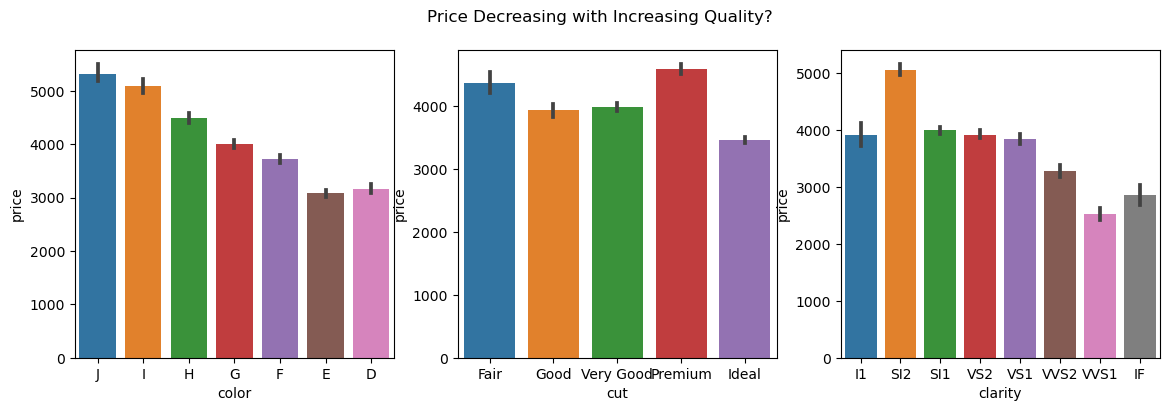

In [99]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14,4))
sns.barplot(x='color', y='price', data=diamonds, ax=ax1)
sns.barplot(x='cut', y='price', data=diamonds, ax=ax2)
sns.barplot(x='clarity', y='price', data=diamonds, ax=ax3)
fig.suptitle('Price Decreasing with Increasing Quality?')

There seems to be a decreasing trend for color and price. The highest quality cut and clarity levels also have low prices. How can this be? Let's dig a little deeper and plot the price for each diamond color again, but make a new plot for each level of clarity:

C:\Users\Sumanth\anaconda3\envs\stablediffusion\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\Sumanth\anaconda3\envs\stablediffusion\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\Sumanth\anaconda3\envs\stablediffusion\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or 

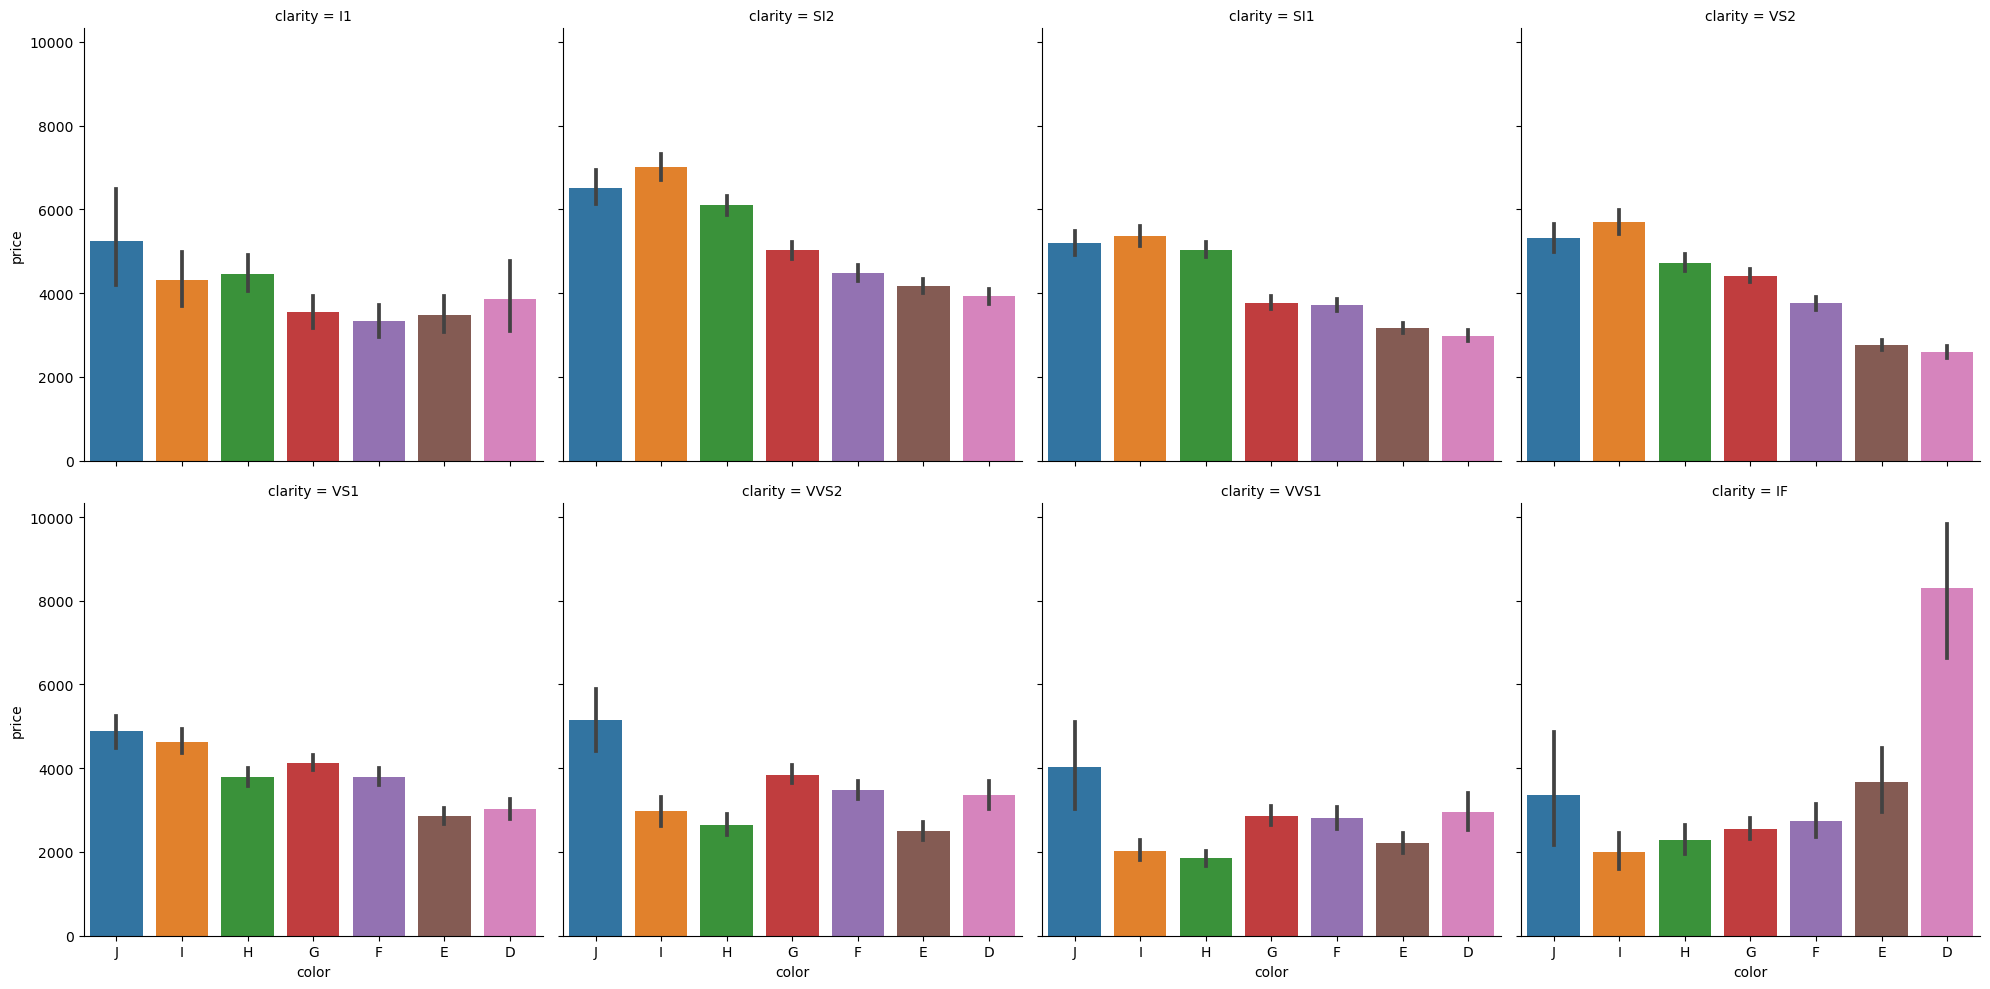

In [102]:
sns.catplot(x='color', y='price', col='clarity',
               col_wrap=4, data=diamonds, kind='bar')

This plot is a little more revealing. Although price appears to decrease as the quality of color increases, it does not do so when clarity is at its highest level. There is actually a substantial increase in price. We have yet to look at just the price of the diamond without paying any attention to its size. Let's recreate the plot from step 3 but use the carat size in place of price:

C:\Users\Sumanth\anaconda3\envs\stablediffusion\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\Sumanth\anaconda3\envs\stablediffusion\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\Sumanth\anaconda3\envs\stablediffusion\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or 

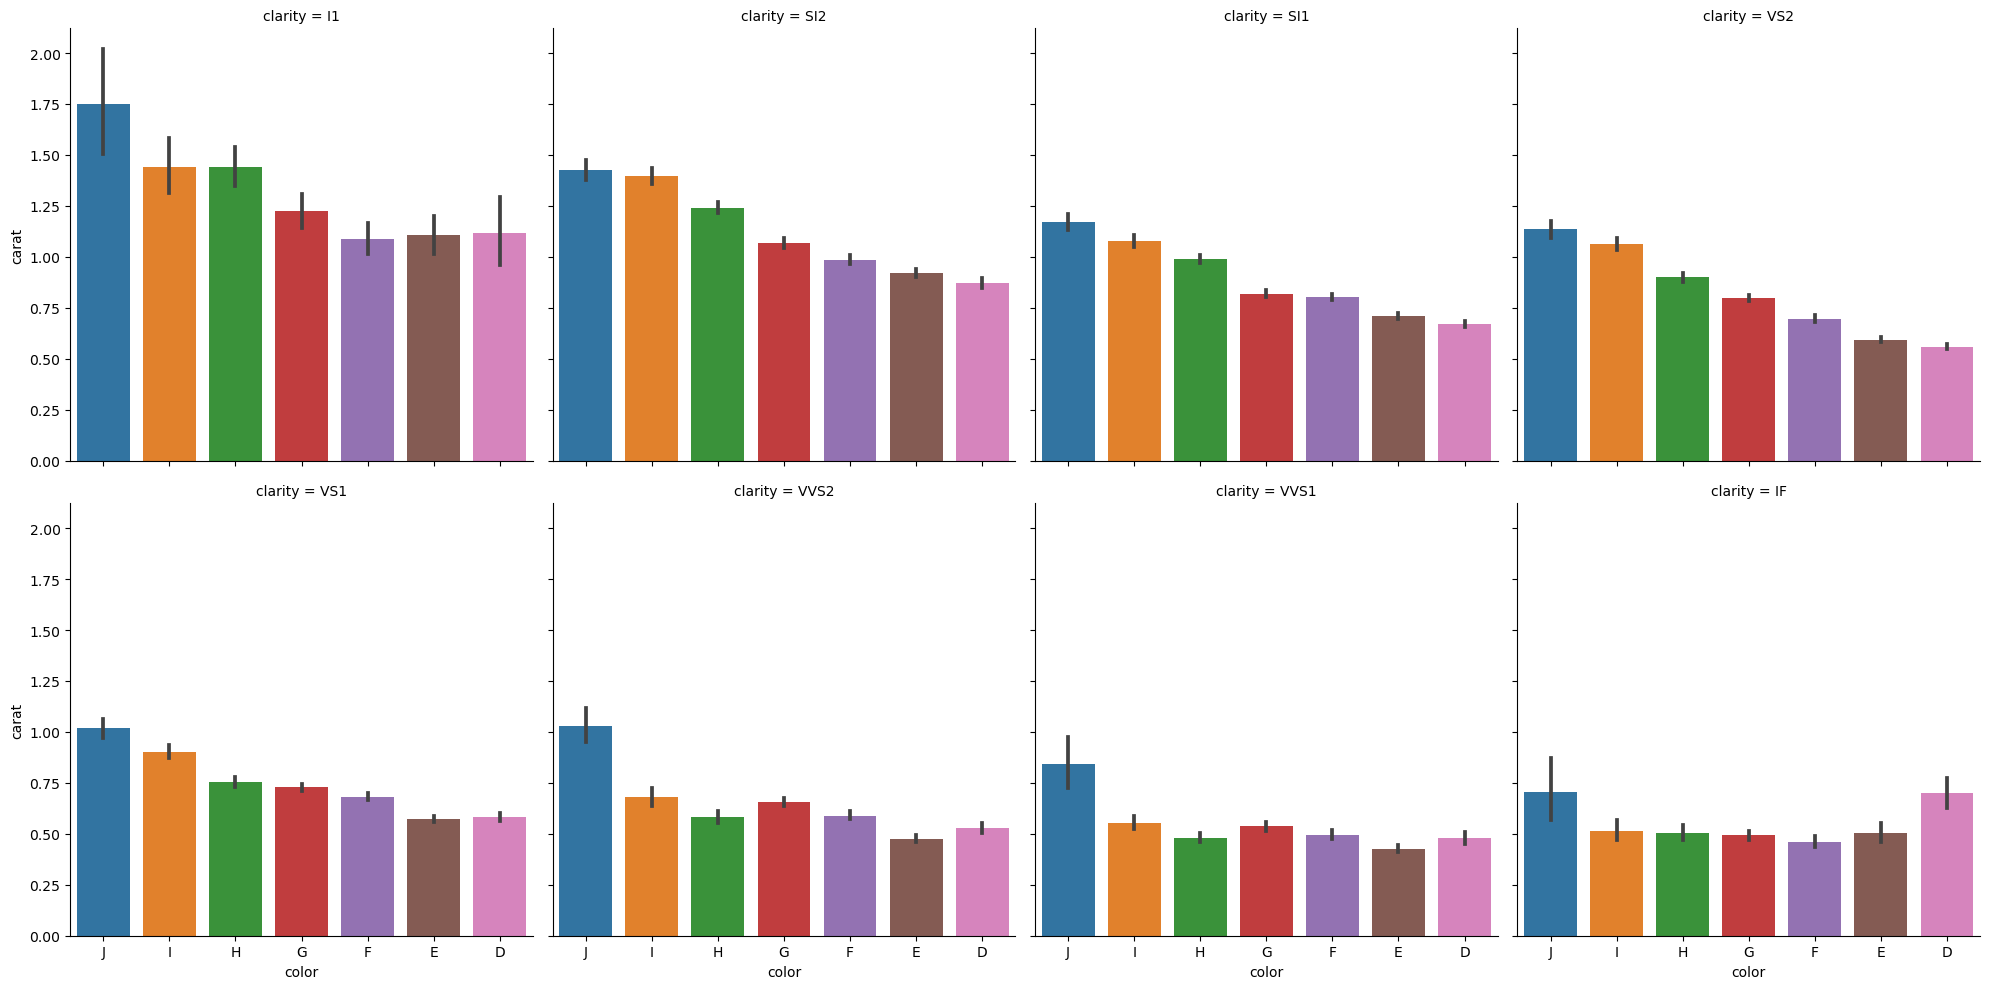

In [103]:
sns.catplot(x='color', y='carat', col='clarity',
               col_wrap=4, data=diamonds, kind='bar')

C:\Users\Sumanth\anaconda3\envs\stablediffusion\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\Sumanth\anaconda3\envs\stablediffusion\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\Sumanth\anaconda3\envs\stablediffusion\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or 

Text(0.5, 0.98, 'Diamond size decreases with quality')

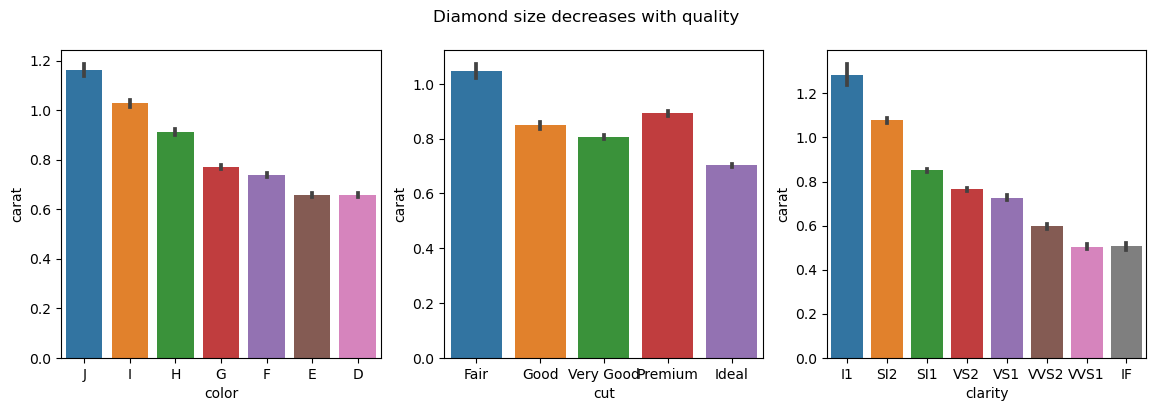

In [104]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14,4))
sns.barplot(x='color', y='carat', data=diamonds, ax=ax1)
sns.barplot(x='cut', y='carat', data=diamonds, ax=ax2)
sns.barplot(x='clarity', y='carat', data=diamonds, ax=ax3)
fig.suptitle('Diamond size decreases with quality')

Now our story is starting to make a bit more sense. Higher quality diamonds appear to be smaller in size, which intuitively makes sense. Let's create a new variable that segments the carat values into five distinct sections, and then create a point plot. The plot that follows accurately reveals that higher quality diamonds do, in fact, cost more money when they are segmented based on size:

C:\Users\Sumanth\anaconda3\envs\stablediffusion\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\Sumanth\anaconda3\envs\stablediffusion\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\Sumanth\anaconda3\envs\stablediffusion\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or 

Text(0.5, 1.02, 'Diamond price by size, color and clarity')

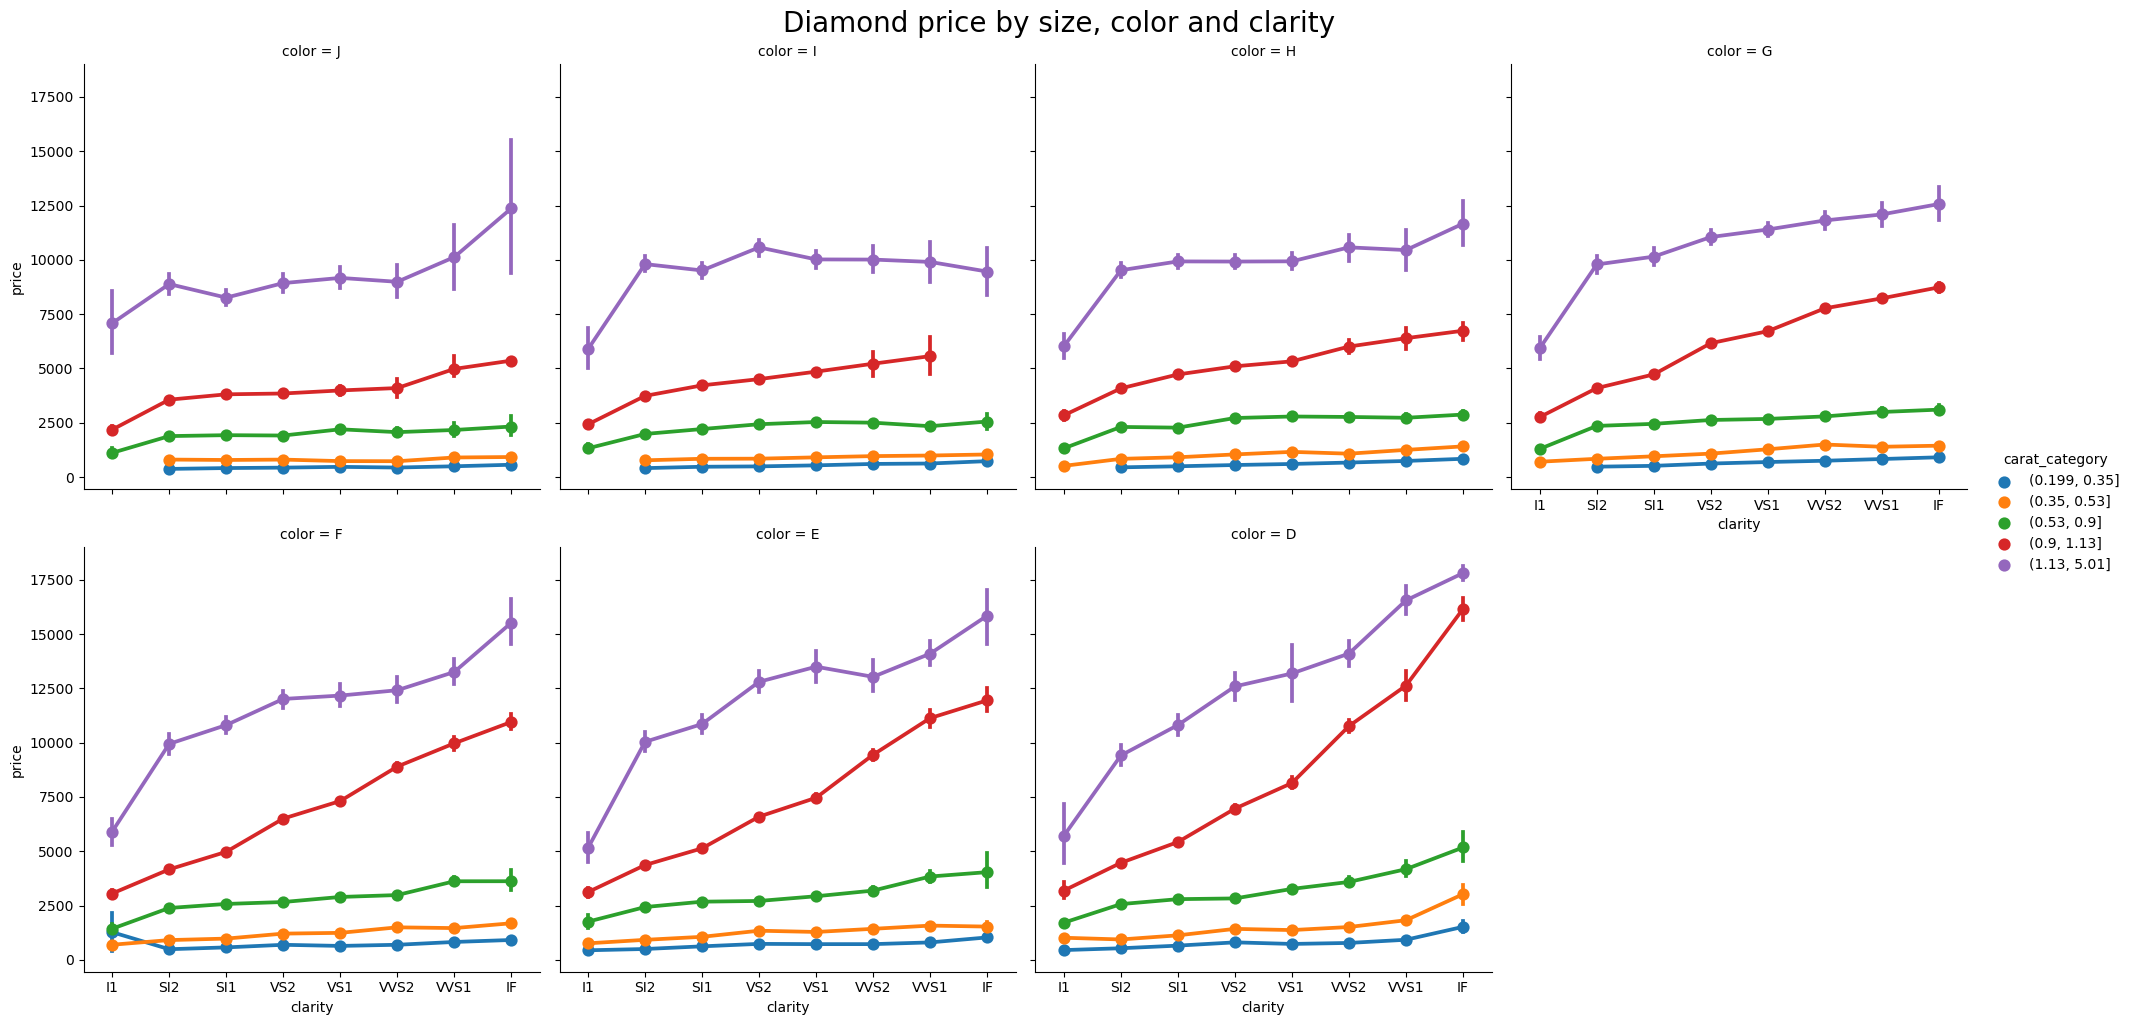

In [105]:
diamonds['carat_category'] = pd.qcut(diamonds.carat, 5)

from matplotlib.cm import Greys
greys = Greys(np.arange(50,250,40))

g = sns.catplot(x='clarity', y='price', data=diamonds,
                   hue='carat_category', col='color', 
                   col_wrap=4, kind='point') #, palette=greys)
g.fig.suptitle('Diamond price by size, color and clarity',
               y=1.02, size=20)

### How it works...

In this recipe, it is very important to create categorical columns, as they are allowed to be ordered. Seaborn uses this ordering to place the labels on the plot. Steps 3 and 4 show what clearly appears to be a downward trend for increasing diamond quality. This is where Simpson's paradox takes center stage. This aggregated result of the whole is being confounded by other variables not yet examined.

The key to uncovering this paradox is to focus on carat size. Step 5 reveals to us that carat size is also decreasing with increasing quality. To account for this fact, we cut the diamond size into five equally-sized bins with the qcut function. By default, this function cuts the variable into discrete categories based on the given quantiles. By passing it an integer, as was done in this step, it creates equally-spaced quantiles. You also have the option of passing it a sequence of explicit non-regular quantiles.

With this new variable, we can make a plot of the mean price per diamond size per group, as done in step 6. The point plot in seaborn creates a line plot connecting the means of each category. The vertical bar at each point is the standard deviation for that group. This plot confirms that diamonds do indeed become more expensive as their quality increases, as long as we hold the carat size as the constant.

### There's more...

The bar plots in steps 3 and 5 could have been created with the more advanced seaborn PairGrid constructor, which can plot a bivariate relationship. Using PairGrid is a two-step process. The first call to PairGrid prepares the grid by alerting it to which variables will be x and which will be y. The second step applies a plot to all of the combinations of x and y columns:

C:\Users\Sumanth\anaconda3\envs\stablediffusion\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\Sumanth\anaconda3\envs\stablediffusion\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\Sumanth\anaconda3\envs\stablediffusion\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or 

Text(0.5, 1.02, 'Replication of Step 3 with PairGrid')

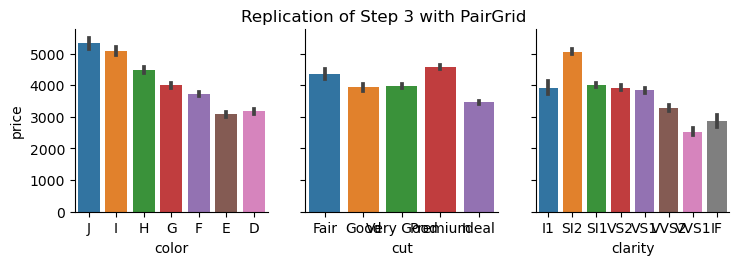

In [107]:
g = sns.PairGrid(diamonds,
                 x_vars=["color", "cut", "clarity"],
                 y_vars=["price"])
g.map(sns.barplot)
g.fig.suptitle('Replication of Step 3 with PairGrid', y=1.02)